# Modeling Economic Growth: Singapore’s Insights for Kenya

# Business Understanding



## Problem Statement


---


Singapore and Kenya both gained independence in the early 1960s, with GDPs of USD917.2 million and  USD926.6 million respectively—virtually on par at the time. However, today Singapore’s economy outpaces Kenya’s by more than fivefold, despite its smaller land mass, limited natural resources, and a smaller population. This stark divergence in economic outcomes raises critical questions about the strategic choices that have driven Singapore’s rapid transformation into a global financial and trade hub.


The objective of this project is to model the factors behind Singapore’s economic trajectory and recommend policies for Kenya using the production approach focusing on the various best performing industries. Through advanced modeling, the project will identify which policy levers have historically produced the most impact on GDP growth and how these can be adapted for Kenya’s context.


## Overview
---
This project aims to analyze the economic strategies and industrial policies that propelled Singapore's extraordinary growth, using a production-based modeling approach. The goal is to derive actionable insights and formulate policy recommendations that Kenya can implement to catalyze sustainable economic development.s


---


### Key Features

---
1. Dataset: Singapore's GDP Production & Debt Data, Labour Productivity, Literacy, Economic Reforms
2. Core method: Time Series Modeling, Clustering, Multi-linear Regression
3. Evaluation Metrics: RMSE, MSE and Adjusted R-squared.

---

###Targeted Variable; GDP
---

## Objectives



---

1. **Compare sectoral contributions to GDP in Singapore and Kenya to identify similarities in growth-driving industries.**
Analyze historical sectoral GDP data from each country to draw context-specific insights that can inform strategic development planning.

2. **Model the Relationship Between Economic Inputs and Output**
Use a production function to estimate how capital, labor, and productivity  have contributed to GDP in Singapore, and provide areas of focus e.g., education, technology and investment incentives.

3. **Identify High-Impact Policies Behind Singapore’s Economic Transformation**
Link sectoral growth with specific policy interventions to determine which policies had the most influence on growth an propose similar policies to Kenya contextually.

4. **Develop and deploy an interactive dashboard to forecast sub-sector growth and estimate their contributions to overall GDP.**
Create a dashboard to visualize and forecast sub-sector growth and GDP contribution. Users can explore scenarios and trends to support data-driven planning. It enables quick insights for strategic decision-making.


## Success criteria



1.   Identify shared high-growth sectors in both countries.
2.   Quantify capital, labor, and productivity contributions accurately.
3.   Link key policies to sectoral growth effectively.
4.   Propose actionable, context-specific strategies for Kenya.
5.   Deploy an interactive dashboard to predict sub-sector growth and GDP impact.











# Data understanding


In [1]:
#importing libraries to support in data understanding and cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, skew, kurtosis
import warnings
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
import xgboost as xgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.utils import class_weight
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from math import sqrt
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

import numpy as np


warnings.filterwarnings('ignore')

In [2]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
!pip install tensorflow==2.11


'DOSKEY' is not recognized as an internal or external command,
operable program or batch file.
ERROR: Could not find a version that satisfies the requirement tensorflow==2.11 (from versions: 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0)
ERROR: No matching distribution found for tensorflow==2.11


In [4]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [5]:
# importing the datasets
df= pd.read_excel('Gdp_production_approach (1).xlsx')
df2 = pd.read_excel('Gross Domestic Product KENYA.xlsx')
df3 = pd.read_excel('Debt and GDP Dataset.xlsx')
df



,Year,GDP At Current Market Prices,Manufacturing,Construction,Utilities,Other Goods Industries,Wholesale Trade,Retail Trade,Transportation & Storage,Accommodation,...,Health & Social Services,"Arts, Entertainment & Recreation",Other Services,Ownership Of Dwellings,Gross Value Added At Basic Prices,Taxes On Products,Population,Per Capita Income,Intermediate Consumption,Employment Level
0,2024,731436.1,119463.3,26063.8,10834.3,200.7,140460.1,8464.1,62906.7,5575.4,...,18199.4,6594.4,7594.9,28441.0,690722.9,40713.2,6036860,8.253435,na,4046200
1,2023,678687.5,115211.0,24025.4,11065.7,195.8,133756.5,8351.8,48919.3,5082.4,...,16533.7,6001.4,7123.9,25277.0,643840.7,34846.8,5917648,8.719253,1202011.3,3986400
2,2022,701766.1,137935.9,21161.8,8207.0,182.3,141345.1,7929.1,80740.3,3619.3,...,14882.8,4782.5,6309.7,20499.3,669961.4,31804.7,5637022,8.032622,1258804.1,3889800
3,2021,586553.1,121023.9,16988.2,6362.5,179.2,106872.6,6924.6,53208.0,2108.8,...,13807.8,3447.5,5760.5,18913.4,556137.1,30416.0,5453566,9.297651,1035913.9,3629500
4,2020,481758.8,94684.8,11025.2,6258.8,158.1,83535.8,6049.7,29964.5,2299.1,...,12464.4,3172.5,5620.7,18782.7,459488.0,22270.8,5685807,11.802186,831523.6,3603300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,1964,2737.2,350.7,150.5,80.5,91.2,na,na,269.7,na,...,na,na,na,80.9,2602.7,134.5,1841600,672.804326,na,na
61,1963,2809.0,328.5,127.6,71.4,91.3,na,na,286.7,na,...,na,na,na,78.8,2681.7,127.3,1795000,639.017444,na,na
62,1962,2529.3,271.4,104.4,69.2,90.8,na,na,280.4,na,...,na,na,na,76.3,2404.2,125.1,1750200,691.970110,na,na
63,1961,2340.7,241.1,93.6,60.0,82.2,na,na,272.8,na,...,na,na,na,73.6,2221.9,118.8,1702400,727.303798,na,na


In [6]:
df2

,Industry,GDP at market prices,All economic activities,"Agriculture, forestry and fishing",Growing of crops,Animal production,Support activities to agriculture,Forestry & logging,Fishing & aquaculture,Mining and quarrying,...,Education,Pre-primary and Primary education,General secondary education,Higher and other education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers;,Financial Intermediation Services Indirectly Measured (FISIM),Taxes on products
0,2018,9340307,8531502,1897475,1356544,341275,22643,125979,51034,68909,...,399515,208393,109878,81245,188778,24541,135539,65710,-215414,808805
1,2019,10237727,9371398,2135709,1542584,354712,24236,156606,57572,72769,...,431876,215329,119592,96955,197969,27056,144894,68917,-226631,866330
2,2020,10715070,9862147,2432613,1786518,384578,25385,172958,63175,76402,...,413090,209929,110010,93151,212966,19941,124379,72064,-218639,852923
3,2021,12027662,11031456,2583190,1844730,431700,27022,199012,80726,92045,...,521945,257440,146660,117846,238544,23511,143824,75242,-244592,996206
4,2022,13368340,12285427,2829505,2036197,463869,27023,218098,84318,120300,...,542704,269179,153432,120093,244335,28078,155623,79420,-264781,1082913


In [7]:
# printing Kenya vs Singapore GDP & Total Debt comparison
df3

,Year,Kenya_Debt_USD,Kenya_GDP_USD,Singapore_Debt _USD,Singapore_GDP_USD
0,1999,3.863485e+09,1.289601e+10,9.750163e+10,1.133740e+11
1,2000,4.663743e+09,1.270535e+10,1.041631e+11,1.283972e+11
2,2001,4.842754e+09,1.298601e+10,1.155038e+11,1.247175e+11
3,2002,5.471843e+09,1.314774e+10,1.215126e+11,1.284481e+11
4,2003,5.656672e+09,1.490452e+10,1.312650e+11,1.318743e+11
5,2004,5.720029e+09,1.609534e+10,1.446498e+11,1.507233e+11
6,2005,6.098952e+09,1.873790e+10,1.550431e+11,1.649016e+11
7,2006,6.499862e+09,2.582551e+10,1.600300e+11,1.830688e+11
8,2007,7.483840e+09,3.195820e+10,1.814676e+11,2.113935e+11
9,2008,9.061082e+09,3.589515e+10,1.980347e+11,2.123578e+11


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     65 non-null     int64  
 1   GDP At Current Market Prices             65 non-null     float64
 2       Manufacturing                        65 non-null     float64
 3       Construction                         65 non-null     float64
 4       Utilities                            65 non-null     float64
 5       Other Goods Industries               65 non-null     float64
 6         Wholesale Trade                    65 non-null     object 
 7         Retail Trade                       65 non-null     object 
 8       Transportation & Storage             65 non-null     float64
 9         Accommodation                      65 non-null     object 
 10        Food & Beverage Services           65 non-null

The dataset has 28 columns and 65 rows with data on Singapore's production components to GDP and factors that affect productivity from 1960 to 2024

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 42 columns):
 #   Column                                                         Non-Null Count  Dtype
---  ------                                                         --------------  -----
 0   Industry                                                       5 non-null      int64
 1   GDP at market prices                                           5 non-null      int64
 2   All economic activities                                        5 non-null      int64
 3   Agriculture, forestry and fishing                              5 non-null      int64
 4   Growing of crops                                               5 non-null      int64
 5   Animal production                                              5 non-null      int64
 6   Support activities to agriculture                              5 non-null      int64
 7   Forestry & logging                                             5 non-null      int64

The dataset has 42 columns and 5 rows with data on Kenya's production components to GDP from 2018 to 2022

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25 non-null     int64  
 1   Kenya_Debt_USD         25 non-null     float64
 2    Kenya_GDP_USD         25 non-null     float64
 3    Singapore_Debt _USD   25 non-null     float64
 4    Singapore_GDP_USD     25 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


The dataset has 5 columns and 25 rows with data on Kenya's and Singapore's Debt and GDP data from 1999 to 2023

In [11]:
#summary statistics for Singapore's GDP production data
df.describe()

,Year,GDP At Current Market Prices,Manufacturing,Construction,Utilities,Other Goods Industries,Transportation & Storage,Information & Communications,Finance & Insurance,Ownership Of Dwellings,Gross Value Added At Basic Prices,Taxes On Products,Population,Per Capita Income
count,65.00000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,6.500000e+01,65.000000
mean,1992.00000,172668.272308,35322.183077,7253.435385,2543.944615,192.150769,14090.150769,7201.378462,20081.896923,6276.766154,163495.770769,9172.501538,3.538394e+06,145.962184
std,18.90767,199915.770062,37463.805772,7157.322259,2634.345457,97.662525,16168.661149,9988.577413,25242.547788,7450.016740,189325.105525,10680.885915,1.386878e+06,215.434742
min,1960.00000,2157.400000,228.200000,67.700000,57.000000,79.900000,256.300000,50.300000,71.900000,68.900000,2040.400000,117.000000,1.646400e+06,8.032622
25%,1976.00000,15003.400000,3313.100000,1084.100000,315.000000,118.200000,1516.800000,303.800000,1089.200000,362.100000,14467.300000,536.100000,2.293300e+06,17.661721
50%,1992.00000,84920.200000,20677.800000,5315.400000,1425.100000,162.700000,8741.700000,2533.400000,10024.700000,2905.600000,80628.500000,4291.700000,3.230698e+06,38.043928
75%,2008.00000,273941.600000,62766.300000,11025.200000,3998.700000,222.800000,22159.200000,9765.600000,30190.000000,10166.200000,259709.600000,14232.000000,4.839396e+06,152.852020
max,2024.00000,731436.100000,137935.900000,26063.800000,11065.700000,456.500000,80740.300000,41307.000000,99026.800000,28441.000000,690722.900000,40713.200000,6.036860e+06,763.140818


In [12]:
#summary statistics for Kenya's GDP production data
df2.describe()

,Industry,GDP at market prices,All economic activities,"Agriculture, forestry and fishing",Growing of crops,Animal production,Support activities to agriculture,Forestry & logging,Fishing & aquaculture,Mining and quarrying,...,Education,Pre-primary and Primary education,General secondary education,Higher and other education,Human health and social work activities,"Arts, entertainment and recreation",Other service activities,Activities of households as employers;,Financial Intermediation Services Indirectly Measured (FISIM),Taxes on products
count,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000e+00
mean,2020.000000,1.113782e+07,1.021639e+07,2.375698e+06,1.713315e+06,395226.800000,25261.800000,174530.600000,67365.000000,86085.000000,...,461826.000000,232054.000000,127914.400000,101858.000000,216518.400000,24625.400000,140851.800000,72270.600000,-234011.40000,9.214354e+05
std,1.581139,1.580109e+06,1.468298e+06,3.669213e+05,2.661372e+05,51738.981008,1879.207732,35980.826516,14543.736109,21049.222943,...,65784.507983,28947.360812,20722.494029,16679.916037,24418.844512,3202.377133,11650.543837,5344.949186,20587.38481,1.141072e+05
min,2018.000000,9.340307e+06,8.531502e+06,1.897475e+06,1.356544e+06,341275.000000,22643.000000,125979.000000,51034.000000,68909.000000,...,399515.000000,208393.000000,109878.000000,81245.000000,188778.000000,19941.000000,124379.000000,65710.000000,-264781.00000,8.088050e+05
25%,2019.000000,1.023773e+07,9.371398e+06,2.135709e+06,1.542584e+06,354712.000000,24236.000000,156606.000000,57572.000000,72769.000000,...,413090.000000,209929.000000,110010.000000,93151.000000,197969.000000,23511.000000,135539.000000,68917.000000,-244592.00000,8.529230e+05
50%,2020.000000,1.071507e+07,9.862147e+06,2.432613e+06,1.786518e+06,384578.000000,25385.000000,172958.000000,63175.000000,76402.000000,...,431876.000000,215329.000000,119592.000000,96955.000000,212966.000000,24541.000000,143824.000000,72064.000000,-226631.00000,8.663300e+05
75%,2021.000000,1.202766e+07,1.103146e+07,2.583190e+06,1.844730e+06,431700.000000,27022.000000,199012.000000,80726.000000,92045.000000,...,521945.000000,257440.000000,146660.000000,117846.000000,238544.000000,27056.000000,144894.000000,75242.000000,-218639.00000,9.962060e+05
max,2022.000000,1.336834e+07,1.228543e+07,2.829505e+06,2.036197e+06,463869.000000,27023.000000,218098.000000,84318.000000,120300.000000,...,542704.000000,269179.000000,153432.000000,120093.000000,244335.000000,28078.000000,155623.000000,79420.000000,-215414.00000,1.082913e+06


In [13]:
# summary stats for Debt and GDP for both countries.
df3.describe()

,Year,Kenya_Debt_USD,Kenya_GDP_USD,Singapore_Debt _USD,Singapore_GDP_USD
count,25.000000,2.500000e+01,2.500000e+01,2.500000e+01,2.500000e+01
mean,2011.000000,2.656733e+10,5.474121e+10,3.173387e+11,2.766542e+11
std,7.359801,2.628670e+10,3.536773e+10,2.161588e+11,1.265330e+11
min,1999.000000,3.863485e+09,1.270535e+10,9.750163e+10,1.133740e+11
25%,2005.000000,6.098952e+09,1.873790e+10,1.550431e+11,1.649016e+11
50%,2011.000000,1.379414e+10,4.686947e+10,2.744367e+11,2.723782e+11
75%,2017.000000,4.055772e+10,8.203651e+10,3.891643e+11,3.678970e+11
max,2023.000000,8.568995e+10,1.144490e+11,8.916742e+11,5.440047e+11


# Data Cleaning



*   Correcting Data Formats
*   Handling null values
*   Dropping duplicates
*   Display and Clean Outliers











###Df Dataset Cleaning

In [14]:
#Checking the data types
df.dtypes

Year                                         int64
GDP At Current Market Prices               float64
    Manufacturing                          float64
    Construction                           float64
    Utilities                              float64
    Other Goods Industries                 float64
      Wholesale Trade                       object
      Retail Trade                          object
    Transportation & Storage               float64
      Accommodation                         object
      Food & Beverage Services              object
    Information & Communications           float64
    Finance & Insurance                    float64
      Real Estate                           object
      Professional Services                 object
      Administrative & Support Services     object
      Public Administration & Defence       object
      Education                             object
      Health & Social Services              object
      Arts, Entertainment & Rec

In [15]:
#converting data formats to float
df[[col for col in df.select_dtypes(include='object').columns if col not in ['year', 'population']]] = df[[col for col in df.select_dtypes(include='object').columns if col not in ['year', 'population']]].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     65 non-null     int64  
 1   GDP At Current Market Prices             65 non-null     float64
 2       Manufacturing                        65 non-null     float64
 3       Construction                         65 non-null     float64
 4       Utilities                            65 non-null     float64
 5       Other Goods Industries               65 non-null     float64
 6         Wholesale Trade                    20 non-null     float64
 7         Retail Trade                       20 non-null     float64
 8       Transportation & Storage             65 non-null     float64
 9         Accommodation                      20 non-null     float64
 10        Food & Beverage Services           20 non-null

In [16]:
df.columns = [
    'year',
    'gdp_current_market_prices',
    'manufacturing',
    'construction',
    'utilities',
    'other_goods_industries',
    'wholesale_trade',
    'retail_trade',
    'transportation_storage',
    'accommodation',
    'food_beverage_services',
    'information_communications',
    'finance_insurance',
    'real_estate',
    'professional_services',
    'administrative_support_services',
    'public_administration_defence',
    'education',
    'health_social_services',
    'arts_entertainment_recreation',
    'other_services',
    'ownership_dwellings',
    'gross_value_added_basic_prices',
    'taxes_on_products',
    'population',
    'per_capita_income',
    'intermediate_consumption',
    'employment_level'
]


In [17]:
df.columns = df.columns.str.strip()
print(df.columns.tolist())

['year', 'gdp_current_market_prices', 'manufacturing', 'construction', 'utilities', 'other_goods_industries', 'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation', 'food_beverage_services', 'information_communications', 'finance_insurance', 'real_estate', 'professional_services', 'administrative_support_services', 'public_administration_defence', 'education', 'health_social_services', 'arts_entertainment_recreation', 'other_services', 'ownership_dwellings', 'gross_value_added_basic_prices', 'taxes_on_products', 'population', 'per_capita_income', 'intermediate_consumption', 'employment_level']


In [18]:
# checking for missing values
df.isna().sum()

year                                0
gdp_current_market_prices           0
manufacturing                       0
construction                        0
utilities                           0
other_goods_industries              0
wholesale_trade                    45
retail_trade                       45
transportation_storage              0
accommodation                      45
food_beverage_services             45
information_communications          0
finance_insurance                   0
real_estate                        45
professional_services              45
administrative_support_services    45
public_administration_defence      45
education                          45
health_social_services             45
arts_entertainment_recreation      45
other_services                     45
ownership_dwellings                 0
gross_value_added_basic_prices      0
taxes_on_products                   0
population                          0
per_capita_income                   0
intermediate

In [19]:
#checking for percentage of missing data per column
missing_percentage = df.isna().mean() * 100
missing_percentage = missing_percentage.round(2)
print(missing_percentage.sort_values(ascending=False))


professional_services              69.23
real_estate                        69.23
other_services                     69.23
arts_entertainment_recreation      69.23
health_social_services             69.23
education                          69.23
wholesale_trade                    69.23
retail_trade                       69.23
public_administration_defence      69.23
accommodation                      69.23
food_beverage_services             69.23
administrative_support_services    69.23
employment_level                   46.15
intermediate_consumption           40.00
finance_insurance                   0.00
gdp_current_market_prices           0.00
information_communications          0.00
transportation_storage              0.00
other_goods_industries              0.00
utilities                           0.00
construction                        0.00
manufacturing                       0.00
ownership_dwellings                 0.00
gross_value_added_basic_prices      0.00
taxes_on_product

In [20]:
# checking for normal distribution to identify data filling method
numeric_cols = df.select_dtypes(include='number').columns

results = []

for col in numeric_cols:
    data = df[col].dropna()
    if len(data) < 3:
        continue

    skew_val = skew(data)
    kurt_val = kurtosis(data, fisher=False)


    stat, p_value = shapiro(data)

    results.append({
        'Variable': col,
        'Skewness': round(skew_val, 2),
        'Kurtosis': round(kurt_val, 2),
        'Shapiro p-value': round(p_value, 4),
        'Normal?': 'Yes' if p_value > 0.05 else 'No'
    })


normality_table = pd.DataFrame(results).sort_values(by='Normal?', ascending=False)
print(normality_table)


                           Variable  Skewness  Kurtosis  Shapiro p-value  \
14            professional_services      0.20      2.33           0.9055   
15  administrative_support_services     -0.01      1.96           0.4662   
7                      retail_trade     -0.18      1.82           0.4280   
9                     accommodation      0.26      2.35           0.4229   
20                   other_services      0.05      2.03           0.8034   
18           health_social_services      0.30      2.00           0.3702   
17                        education     -0.36      1.85           0.2216   
16    public_administration_defence      0.20      1.76           0.2424   
26         intermediate_consumption      0.93      3.12           0.0025   
25                per_capita_income      1.73      4.57           0.0000   
24                       population      0.35      1.70           0.0001   
23                taxes_on_products      1.14      3.22           0.0000   
22   gross_v

In [21]:
# Adopting Mean Imputation for columns with normal distribution and median imputation for non-normally distributed data
mean_cols = [
    'administrative_support_services',
    'other_services',
    'health_social_services',
    'public_administration_defence',
    'education'
]
df[mean_cols] = df[mean_cols].fillna(df[mean_cols].mean())


median_cols = [
    'gdp_current_market_prices',
    'intermediate_consumption',
    'per_capita_income',
    'population',
    'taxes_on_products',
    'gross_value_added_basic_prices',
    'ownership_dwellings',
    'arts_entertainment_recreation',
    'professional_services',
    'manufacturing',
    'real_estate',
    'finance_insurance',
    'information_communications',
    'food_beverage_services',
    'accommodation',
    'transportation_storage',
    'retail_trade',
    'wholesale_trade',
    'other_goods_industries',
    'utilities',
    'construction',
    'employment_level'
]
df[median_cols] = df[median_cols].fillna(df[median_cols].median())


In [22]:
#confirmation of null values after imputation
print(df.isna().sum())

year                               0
gdp_current_market_prices          0
manufacturing                      0
construction                       0
utilities                          0
other_goods_industries             0
wholesale_trade                    0
retail_trade                       0
transportation_storage             0
accommodation                      0
food_beverage_services             0
information_communications         0
finance_insurance                  0
real_estate                        0
professional_services              0
administrative_support_services    0
public_administration_defence      0
education                          0
health_social_services             0
arts_entertainment_recreation      0
other_services                     0
ownership_dwellings                0
gross_value_added_basic_prices     0
taxes_on_products                  0
population                         0
per_capita_income                  0
intermediate_consumption           0
e

In [23]:
# checking for duplicates
df.duplicated().sum()

0

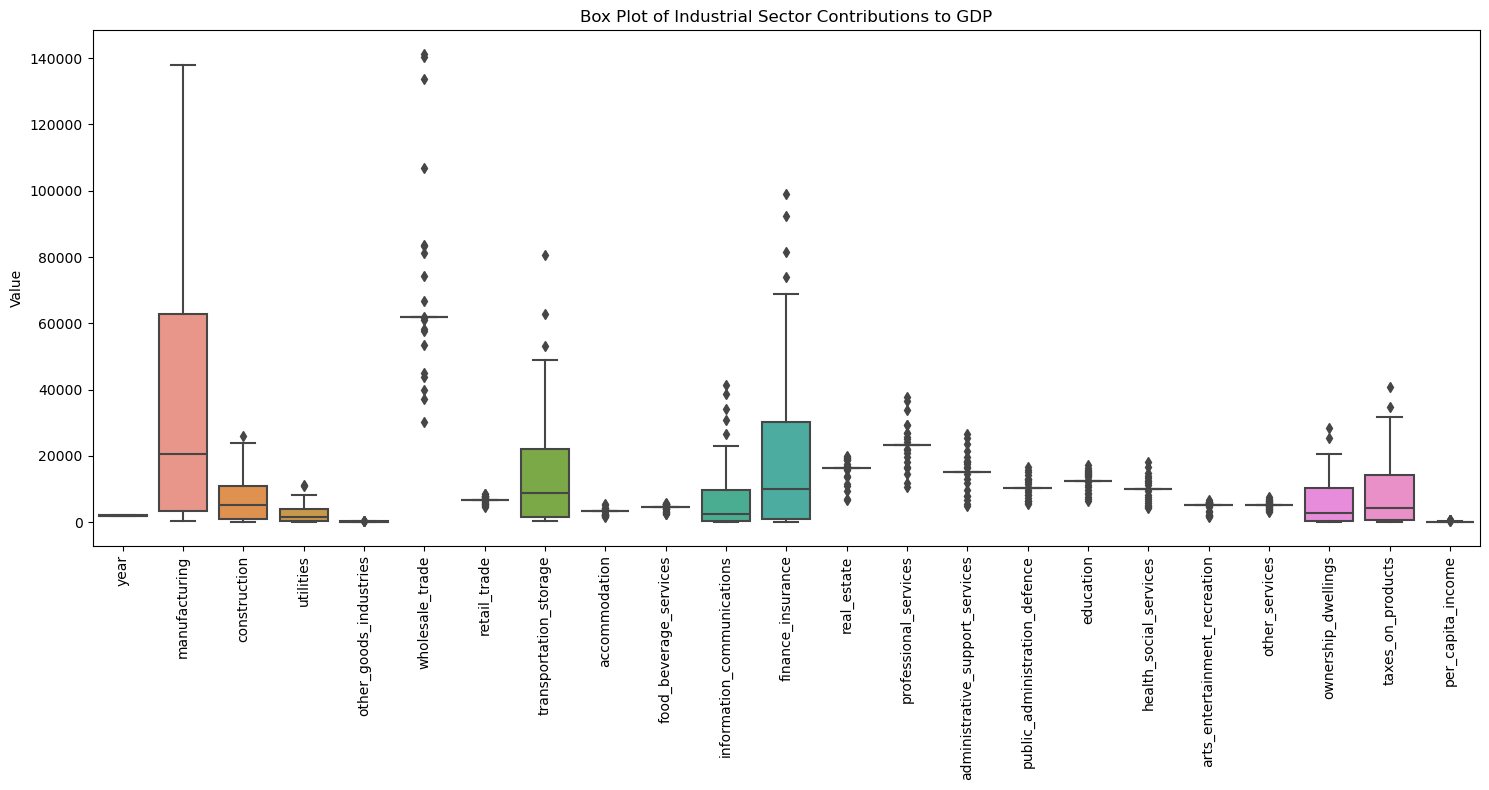

In [24]:
#checking for outliers on df dataset while removing items with totals or high values
df = df.select_dtypes(include=np.number)

df_outliers = df.drop(columns = ['population','gdp_current_market_prices','intermediate_consumption','employment_level','gross_value_added_basic_prices'] )

plt.figure(figsize=(15, 8))
sns.boxplot(data=df_outliers)
plt.title('Box Plot of Industrial Sector Contributions to GDP')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Wholesale trade, real estate, professional services, administrative support sevices, public administration defence, education, health social services arts and other services seem to be having numerous outliers

In [25]:

# Calculating the percentage of outliers for each column and displaying in descending order
outlier_percentages = {}
for col in df_outliers.columns:
    Q1 = df_outliers[col].quantile(0.25)
    Q3 = df_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_outliers[(df_outliers[col] < lower_bound) | (df_outliers[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df_outliers)) * 100
    outlier_percentages[col] = outlier_percentage

outlier_percentages_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Column', 'Outlier Percentage'])
outlier_percentages_df = outlier_percentages_df.sort_values(by='Outlier Percentage', ascending=False).reset_index(drop=True)

print("Outliers per Column:")
outlier_percentages_df


Outliers per Column:


,Column,Outlier Percentage
0,public_administration_defence,30.769231
1,other_services,30.769231
2,arts_entertainment_recreation,30.769231
3,wholesale_trade,30.769231
4,retail_trade,30.769231
5,health_social_services,30.769231
6,accommodation,30.769231
7,food_beverage_services,30.769231
8,education,30.769231
9,real_estate,30.769231


11 columns have ouliers upto 30%, one with 15% and the rest with less than 10%

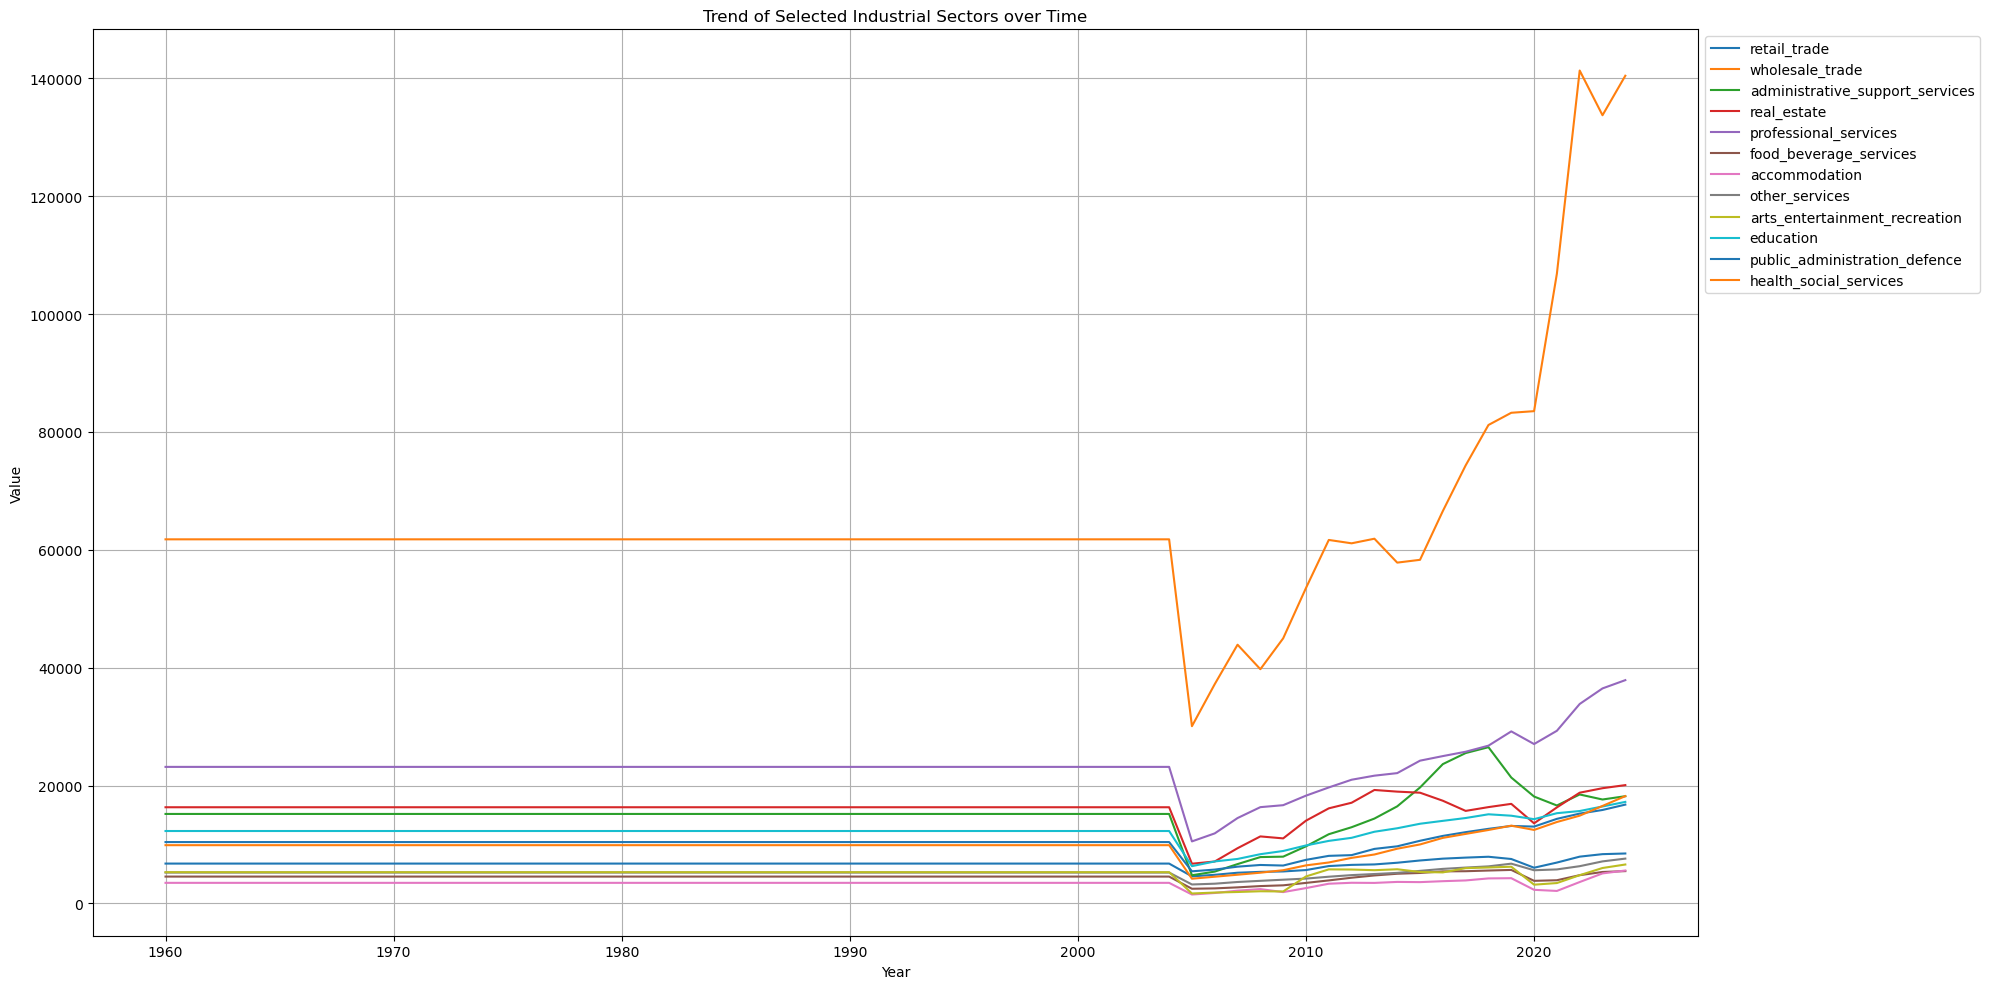

In [26]:
# plotting a graph showing the trend of top columns with outliers

columns_to_plot = [
    'retail_trade',
    'wholesale_trade',
    'administrative_support_services',
    'real_estate',
    'professional_services',
    'food_beverage_services',
    'accommodation',
    'other_services',
    'arts_entertainment_recreation',
    'education',
    'public_administration_defence',
    'health_social_services'
]


df_plot = df.set_index('year')


plt.figure(figsize=(20, 10))
for col in columns_to_plot:
    if col in df_plot.columns:
        plt.plot(df_plot.index, df_plot[col], label=col)

plt.title('Trend of Selected Industrial Sectors over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

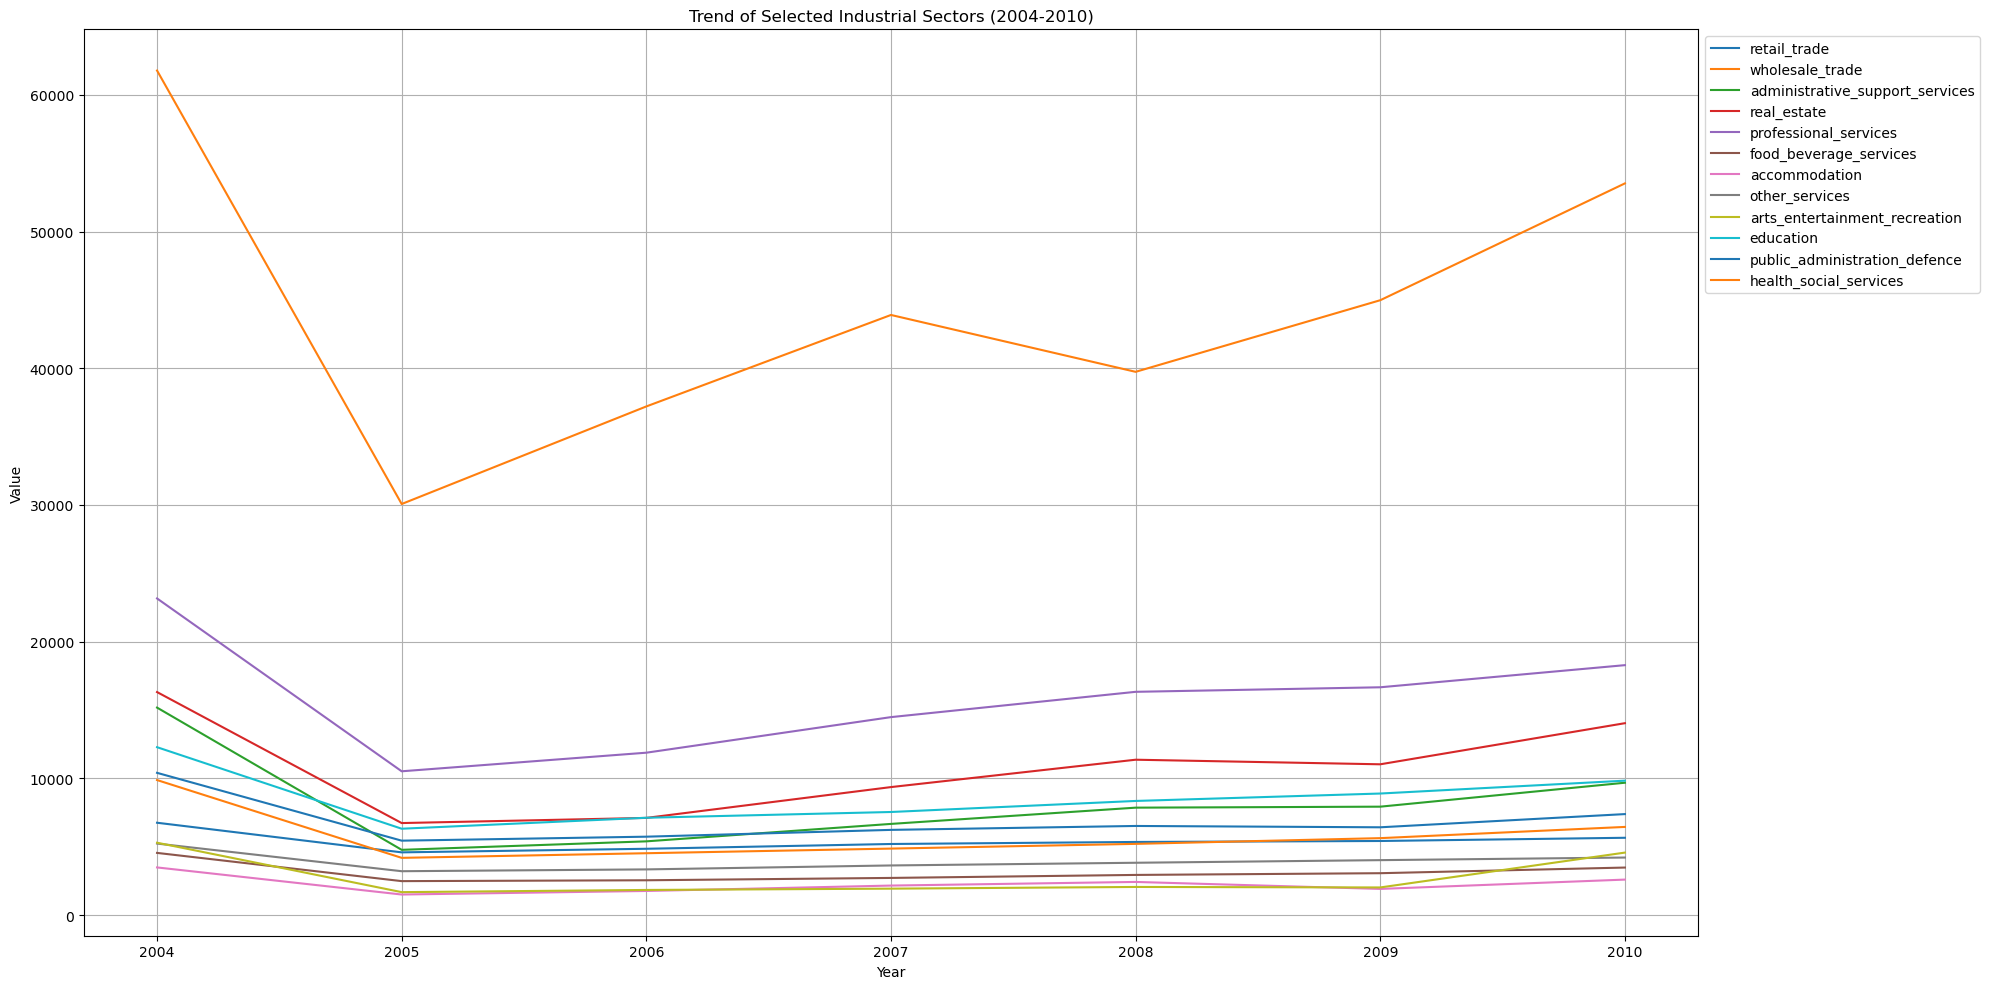

In [27]:
df_plot = df.set_index('year')

# Filtering the DataFrame to include only data between 2004 and 2010
df_filtered_plot = df_plot[(df_plot.index >= 2004) & (df_plot.index <= 2010)]

plt.figure(figsize=(20, 10))
for col in columns_to_plot:
    if col in df_filtered_plot.columns:
        plt.plot(df_filtered_plot.index, df_filtered_plot[col], label=col)

plt.title('Trend of Selected Industrial Sectors (2004-2010)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

 There was a dip in 2005 which can be explained by Real Gross Domestic Product (GDP) growth dropping from 9.2% in 2004 to 7.4% in 2005. This moderation was influenced by slower growth in major economies like the United States and Japan which Singapore mostly relies on for exports and trade and investment.

Normalization of outliers will not be applied to preserve the integrity of critical, time-series data and avoid altering genuine historical values

### Df2 Dataset Cleaning

In [28]:
#formatting df2 columns to contain underscores on the title

df2.columns = [col.replace(' ', '_').lower() for col in df2.columns]
print(df2.columns.tolist())
df2.columns

['industry', 'gdp_at_market_prices', 'all_economic_activities', 'agriculture,_forestry_and_fishing', 'growing_of_crops', 'animal_production', 'support_activities_to_agriculture', 'forestry_&_logging', 'fishing_&_aquaculture', 'mining_and_quarrying', 'manufacturing', 'manufacture_of_food,_beverages_and_tobacco', 'other_manufacturing_and_repair_and_installation', 'electricity_supply', 'water_supply;_sewerage,_waste_management', 'construction', 'wholesale_and_retail_trade;_repairs', 'transportation_and_storage', 'land_transport', 'air_transport_including_support_services', 'all_other_transport_including_postal_and_courier_activities', 'accommodation_and_food_service_activities', 'information_and_communication', 'telecommunications', 'publishing,_broadcasting,_other_it_and_information_activities', 'financial_and_insurance_activities', 'financial_activities', 'insurance_activities', 'real_estate', 'professional,_scientific_and_technical_activities', 'administrative_and_support_service_activ

Index(['industry', 'gdp_at_market_prices', 'all_economic_activities',
       'agriculture,_forestry_and_fishing', 'growing_of_crops',
       'animal_production', 'support_activities_to_agriculture',
       'forestry_&_logging', 'fishing_&_aquaculture', 'mining_and_quarrying',
       'manufacturing', 'manufacture_of_food,_beverages_and_tobacco',
       'other_manufacturing_and_repair_and_installation', 'electricity_supply',
       'water_supply;_sewerage,_waste_management', 'construction',
       'wholesale_and_retail_trade;_repairs', 'transportation_and_storage',
       'land_transport', 'air_transport_including_support_services',
       'all_other_transport_including_postal_and_courier_activities',
       'accommodation_and_food_service_activities',
       'information_and_communication', 'telecommunications',
       'publishing,_broadcasting,_other_it_and_information_activities',
       'financial_and_insurance_activities', 'financial_activities',
       'insurance_activities', 'real

In [29]:
df2.isna().sum()

industry                                                         0
gdp_at_market_prices                                             0
all_economic_activities                                          0
agriculture,_forestry_and_fishing                                0
growing_of_crops                                                 0
animal_production                                                0
support_activities_to_agriculture                                0
forestry_&_logging                                               0
fishing_&_aquaculture                                            0
mining_and_quarrying                                             0
manufacturing                                                    0
manufacture_of_food,_beverages_and_tobacco                       0
other_manufacturing_and_repair_and_installation                  0
electricity_supply                                               0
water_supply;_sewerage,_waste_management                      

In [30]:
df2.duplicated().sum()

0

There are no duplicated values

In [31]:
df2.columns


Index(['industry', 'gdp_at_market_prices', 'all_economic_activities',
       'agriculture,_forestry_and_fishing', 'growing_of_crops',
       'animal_production', 'support_activities_to_agriculture',
       'forestry_&_logging', 'fishing_&_aquaculture', 'mining_and_quarrying',
       'manufacturing', 'manufacture_of_food,_beverages_and_tobacco',
       'other_manufacturing_and_repair_and_installation', 'electricity_supply',
       'water_supply;_sewerage,_waste_management', 'construction',
       'wholesale_and_retail_trade;_repairs', 'transportation_and_storage',
       'land_transport', 'air_transport_including_support_services',
       'all_other_transport_including_postal_and_courier_activities',
       'accommodation_and_food_service_activities',
       'information_and_communication', 'telecommunications',
       'publishing,_broadcasting,_other_it_and_information_activities',
       'financial_and_insurance_activities', 'financial_activities',
       'insurance_activities', 'real

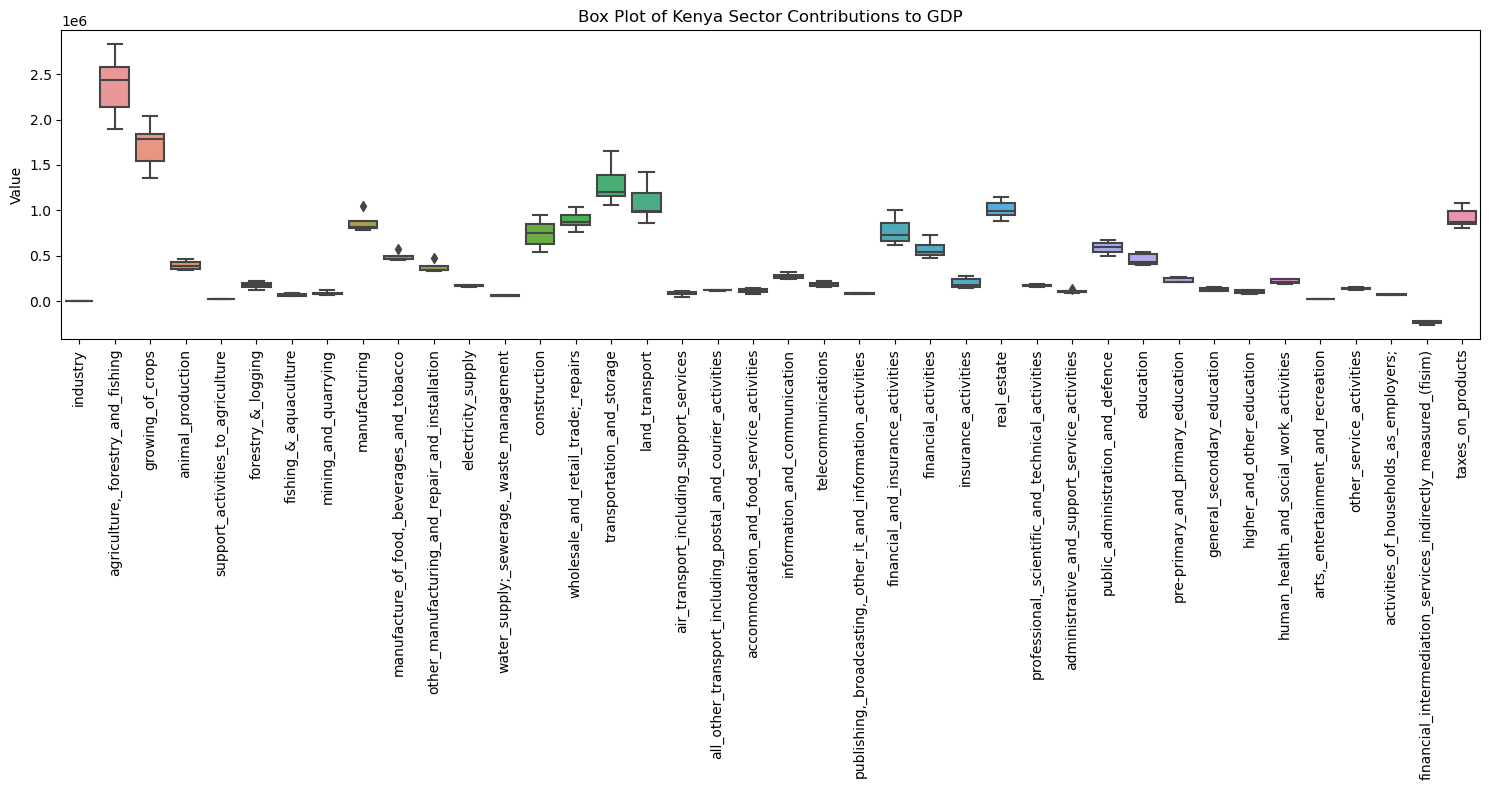

In [32]:
#Plotting df2 oultiers excluding 'GDP at market prices', 'All economic activities'
df2_for_outliers = df2.drop(columns=['gdp_at_market_prices', 'all_economic_activities'])

plt.figure(figsize=(15, 8))
sns.boxplot(data=df2_for_outliers)
plt.title('Box Plot of Kenya Sector Contributions to GDP')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

There are no significant outliers in df2

###Df3 Dataset Cleaning

In [33]:
#removing spaces on column titles for df3 dataset
df3.columns = df3.columns.str.strip()
print(df3.columns.tolist())

['Year', 'Kenya_Debt_USD', 'Kenya_GDP_USD', 'Singapore_Debt _USD', 'Singapore_GDP_USD']


In [34]:
# converting object columns to float (numerical) for df3
cols_to_convert = ['Kenya_Debt_USD', 'Kenya_GDP_USD', 'Singapore_Debt _USD','Singapore_GDP_USD']

for col in cols_to_convert:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')


In [35]:
#checking for null values in df3
df3.isna().sum()

Year                   0
Kenya_Debt_USD         0
Kenya_GDP_USD          0
Singapore_Debt _USD    0
Singapore_GDP_USD      0
dtype: int64

No null values for df3 dataset

In [36]:
#checking for duplicated values in df3 dataset
df3.duplicated().sum()

0

No duplicated values in df3 dataset

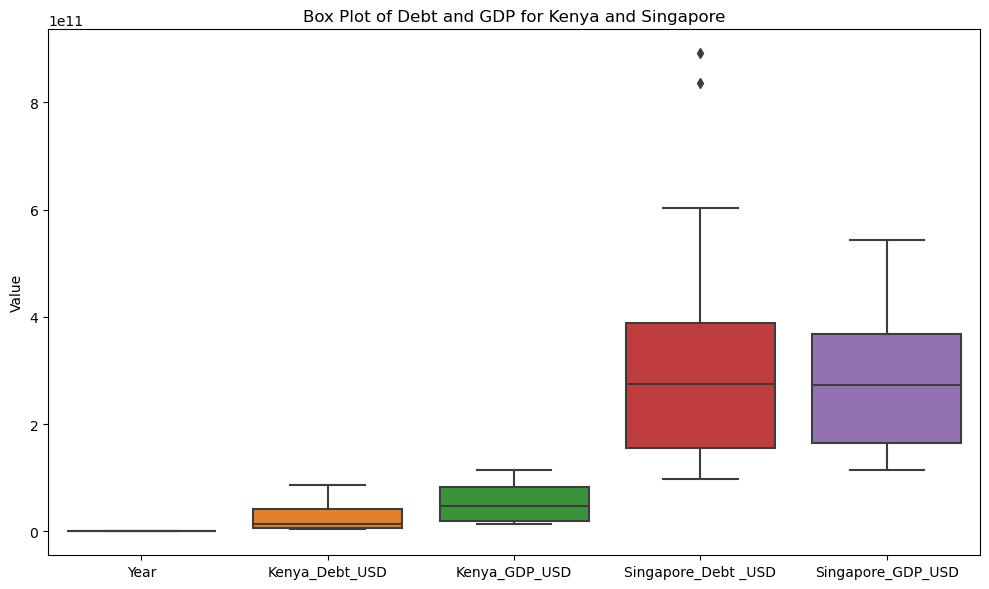

Outliers per Column (df3):


,Column,Outlier Percentage
0,Singapore_Debt _USD,8.0
1,Year,0.0
2,Kenya_Debt_USD,0.0
3,Kenya_GDP_USD,0.0
4,Singapore_GDP_USD,0.0


In [37]:
#checking for outliers on df3 dataset
df3 = df3.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.boxplot(data=df3)
plt.title('Box Plot of Debt and GDP for Kenya and Singapore')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


outlier_percentages_df3 = {}
for col in df3.columns:
    Q1 = df3[col].quantile(0.25)
    Q3 = df3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df3[(df3[col] < lower_bound) | (df3[col] > upper_bound)]
    outlier_percentage = (len(outliers) / len(df3)) * 100
    outlier_percentages_df3[col] = outlier_percentage

outlier_percentages_df3 = pd.DataFrame(list(outlier_percentages_df3.items()), columns=['Column', 'Outlier Percentage'])
outlier_percentages_df3 = outlier_percentages_df3.sort_values(by='Outlier Percentage', ascending=False).reset_index(drop=True)

print("Outliers per Column (df3):")
outlier_percentages_df3

There are no significant outliers on df3

# Exploratory Data Analysis

### Singapores' total contribution of various sectors to GDP over Time

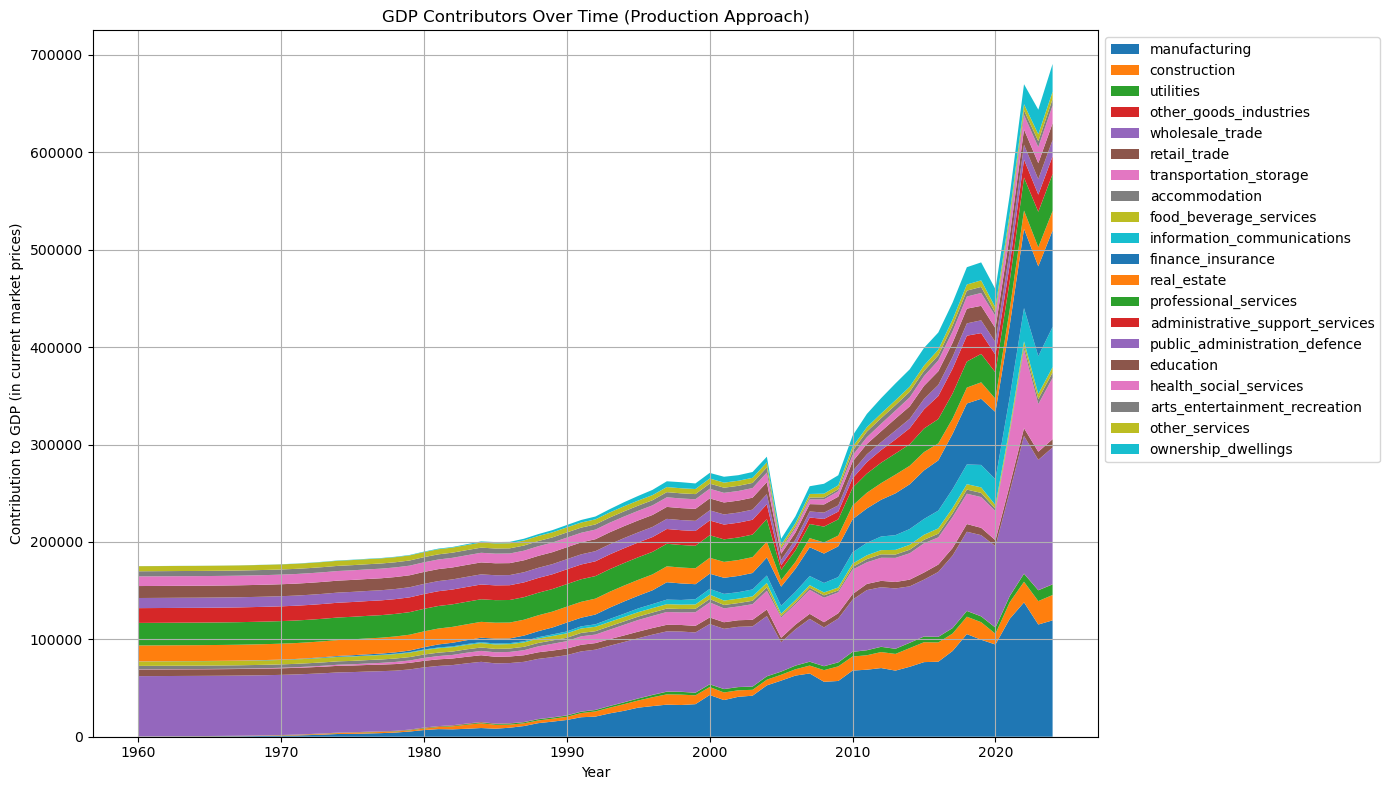

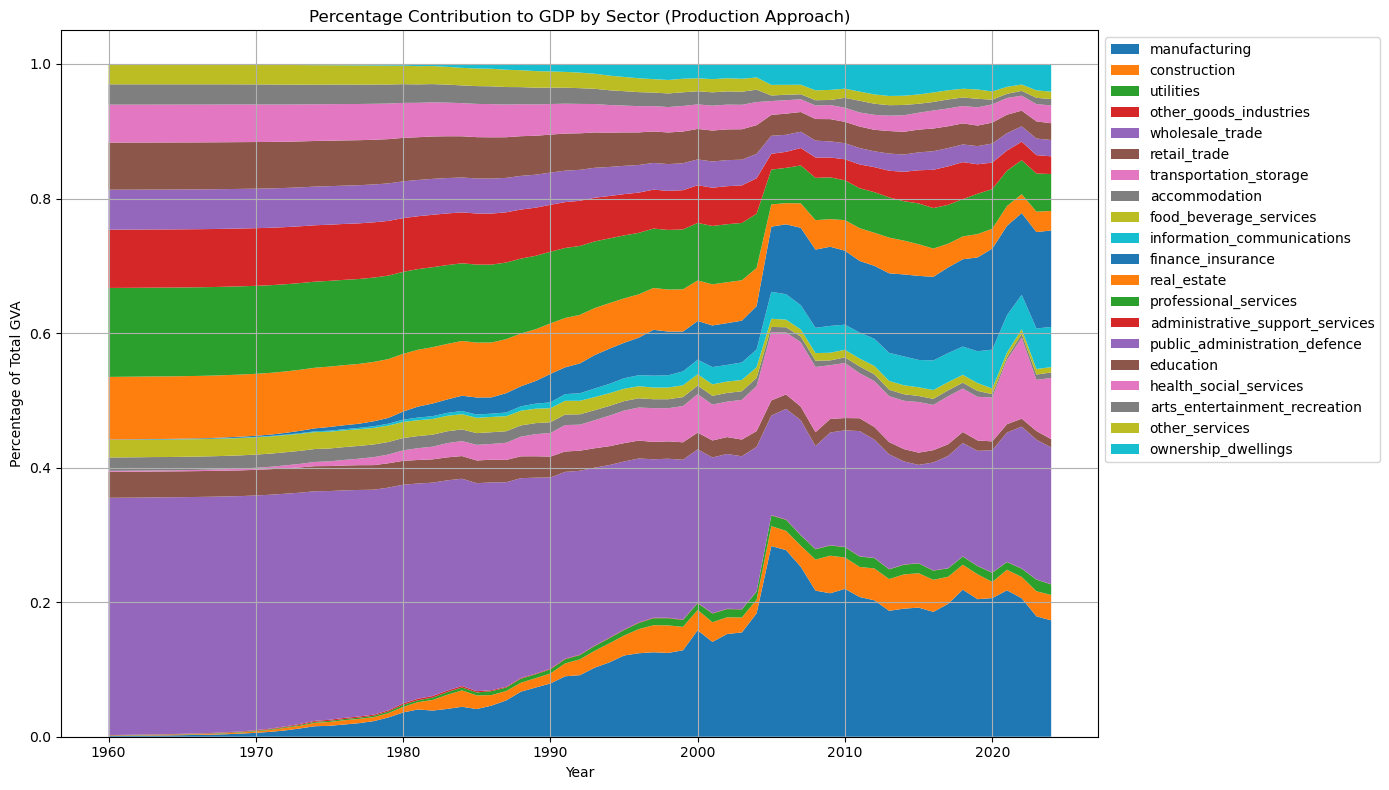

In [38]:

sectors = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage',
    'accommodation', 'food_beverage_services', 'information_communications',
    'finance_insurance', 'real_estate', 'professional_services',
    'administrative_support_services', 'public_administration_defence',
    'education', 'health_social_services', 'arts_entertainment_recreation',
    'other_services', 'ownership_dwellings'
]


df = df.sort_values('year')

plt.figure(figsize=(14, 8))
plt.stackplot(df['year'], [df[sector] for sector in sectors], labels=sectors)
plt.title('GDP Contributors Over Time (Production Approach)')
plt.xlabel('Year')
plt.ylabel('Contribution to GDP (in current market prices)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()


df_total = df[sectors].sum(axis=1)
df_percent = df[sectors].div(df_total, axis=0)

plt.figure(figsize=(14, 8))
plt.stackplot(df['year'], [df_percent[sector] for sector in sectors], labels=sectors)
plt.title('Percentage Contribution to GDP by Sector (Production Approach)')
plt.xlabel('Year')
plt.ylabel('Percentage of Total GVA')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()


The plots illustrate sectoral contributions to GDP over time, showing both absolute growth and evolving proportional economic structure.

This also shows the dip in GDP in both 2005 as stated above and 2020 due to Covid 19

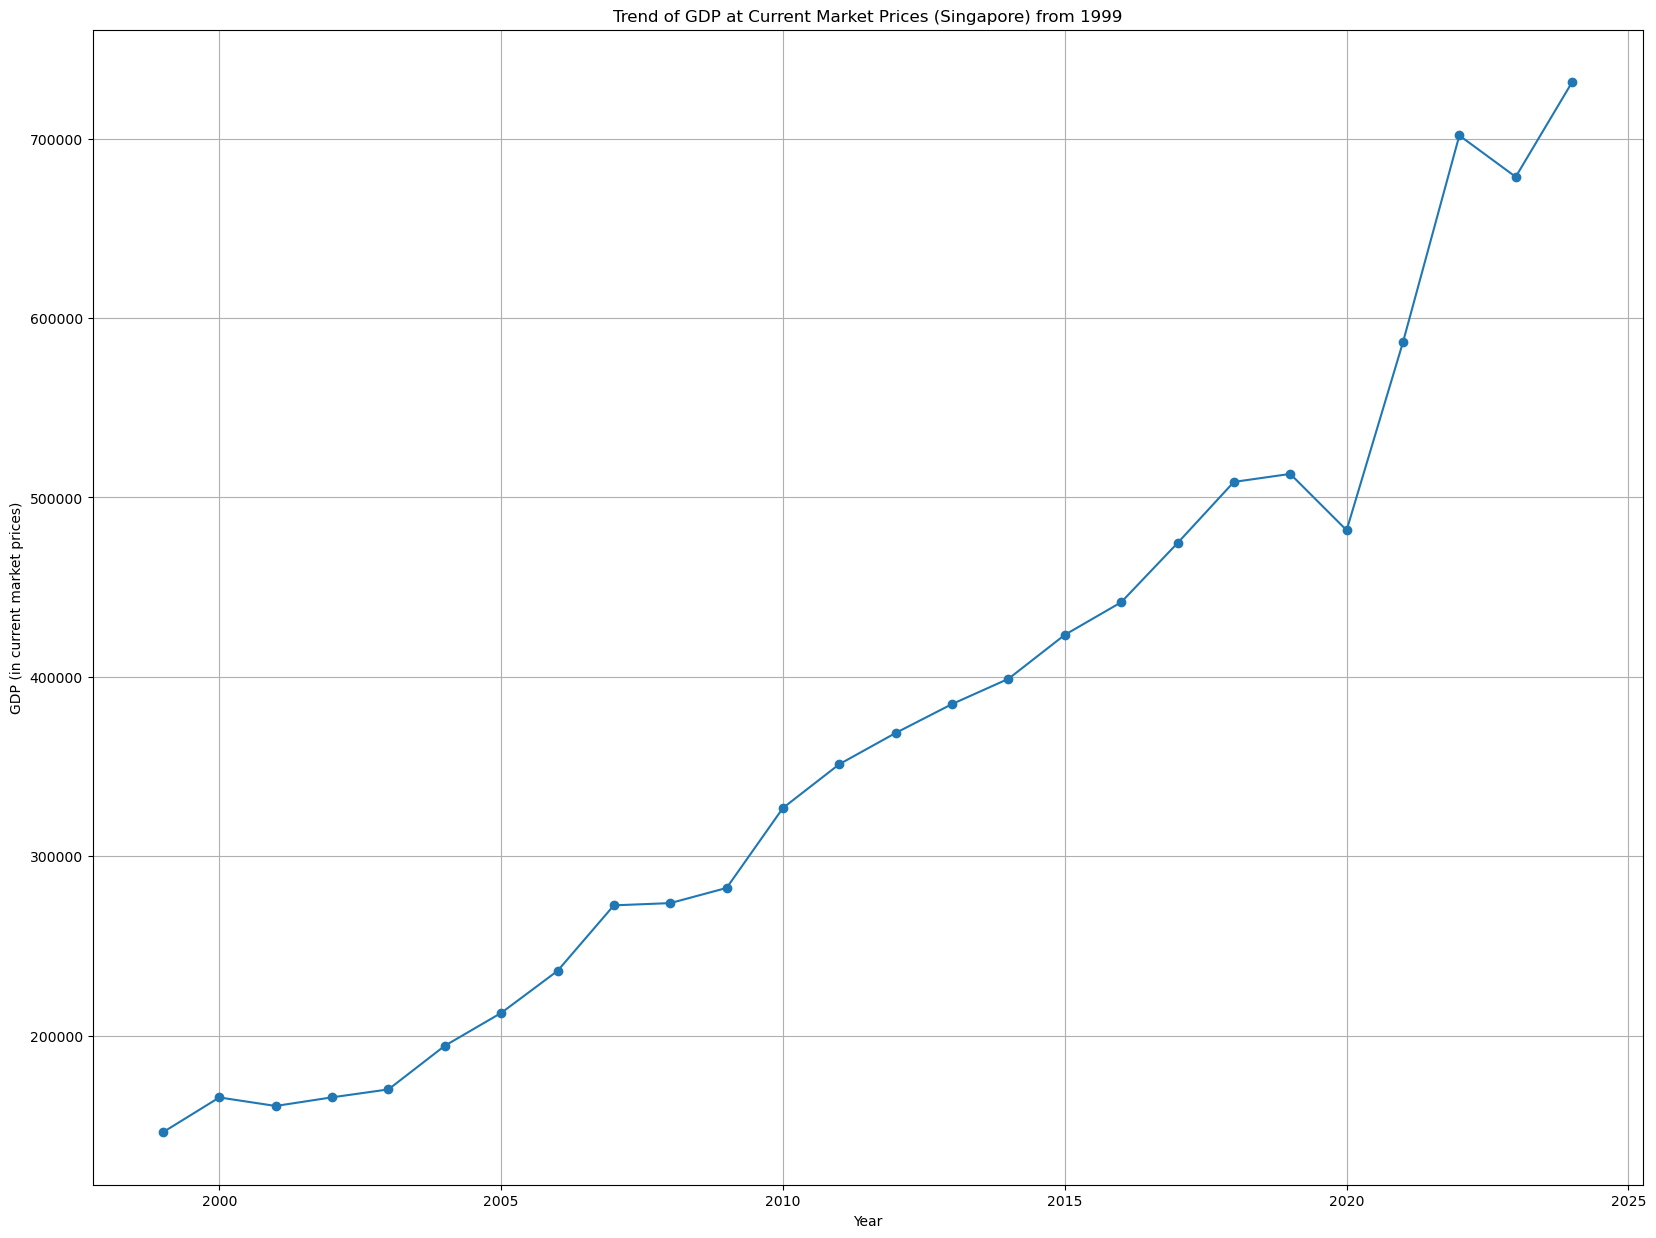

In [39]:
# Plotting trend of 'gdp_current_market_prices' from df from 1999

df_filtered = df[df['year'] >= 1999].copy()


plt.figure(figsize=(20, 15))
plt.plot(df_filtered['year'], df_filtered['gdp_current_market_prices'], marker='o', linestyle='-')
plt.title('Trend of GDP at Current Market Prices (Singapore) from 1999')
plt.xlabel('Year')
plt.ylabel('GDP (in current market prices)')
plt.grid(True)
plt.show()


There seems to be a trend which highlights key years of rise and drop of GDP like 2005, 2020, 2022 and 2024 which needs to be studied further

### Top Performing Sectors by Total GDP Contribution Singapore and Kenya

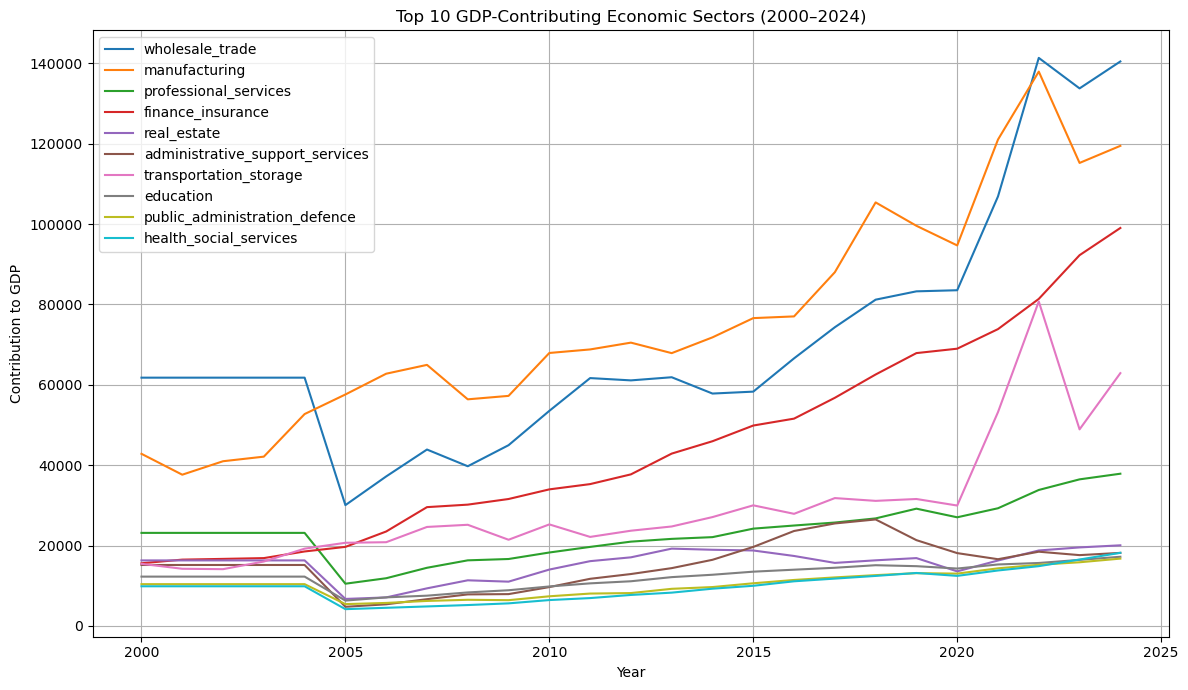

In [40]:
sectors = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage',
    'accommodation', 'food_beverage_services', 'information_communications',
    'finance_insurance', 'real_estate', 'professional_services',
    'administrative_support_services', 'public_administration_defence',
    'education', 'health_social_services', 'arts_entertainment_recreation',
    'other_services', 'ownership_dwellings'
]

df_period = df[(df['year'] >= 2000) & (df['year'] <= 2024)].copy()
df_period = df_period.sort_values('year')



sector_totals = df[sectors].sum().sort_values(ascending=False)


top_10_sectors = sector_totals.head(10).index.tolist()


plt.figure(figsize=(12, 7))

for sector in top_10_sectors:

    plt.plot(df_period['year'], df_period[sector], label=sector)

plt.title('Top 10 GDP-Contributing Economic Sectors (2000–2024)')
plt.xlabel('Year')
plt.ylabel('Contribution to GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Manufacturing followed by wholesale trade , finance and insurance, transportation and storage and professional services have the highest value contribution to GDP over time

It seems that manufacturing, transportation and storage and finance and insurance were not affected by the dip in GDP drop in 2005 which need to be investigated further

There also seems to be a spike between 2020 and 2024 for certain sectors

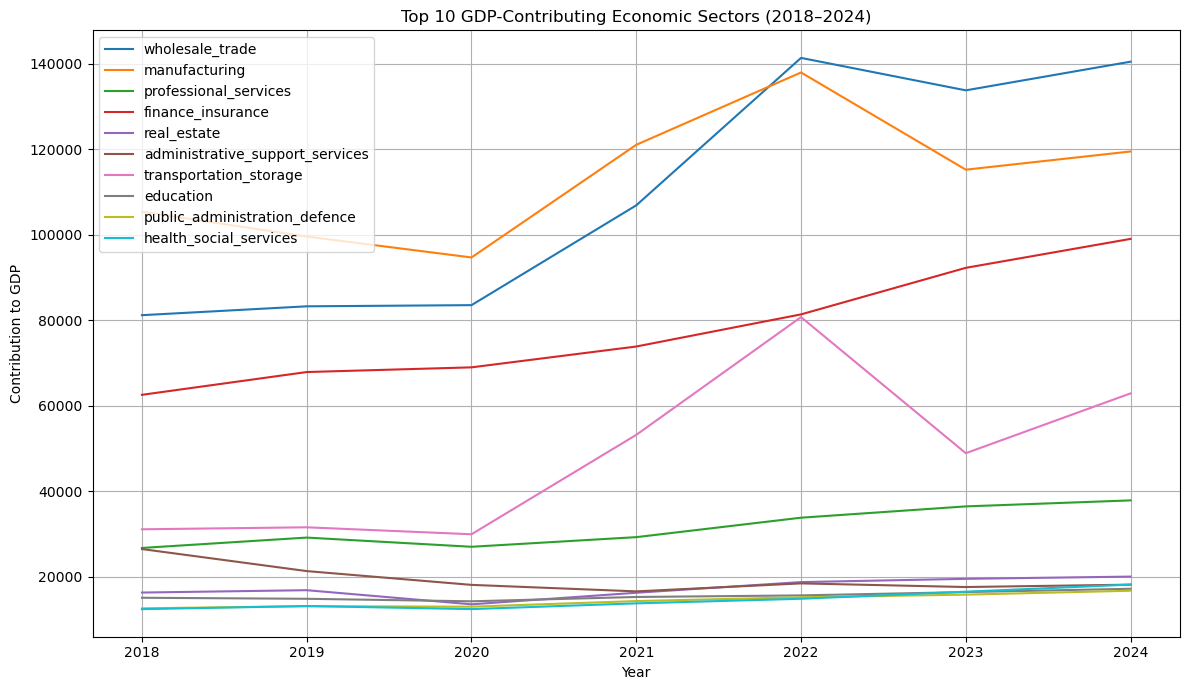

In [41]:
#2018 to 2024

df_top_10 = df[(df['year'] >= 2018) & (df['year'] <= 2024)]
df_top_10 = df[(df['year'] >= 2018) & (df['year'] <= 2024)].copy()
df_top_10 = df_top_10.sort_values('year')


sector_totals = df[sectors].sum().sort_values(ascending=False)

top_10_sectors = sector_totals.head(10).index.tolist()

plt.figure(figsize=(12, 7))

for sector in top_10_sectors:

    if sector in df_top_10.columns:
        plt.plot(df_top_10['year'], df_top_10[sector], label=sector)

plt.title('Top 10 GDP-Contributing Economic Sectors (2018–2024)')
plt.xlabel('Year')
plt.ylabel('Contribution to GDP')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In 2022 there was a spike in manufacturing, wholesale trade and transportation and trade. This may have been a resurgence from covid 19 which needs further investigation

In [42]:
#Dropping columns on df2

df2 = df2.drop(columns=[
    'growing_of_crops',
    'animal_production',
    'support_activities_to_agriculture',
    'manufacture_of_food,_beverages_and_tobacco',
    'other_manufacturing_and_repair_and_installation',
    'land_transport',
    'air_transport_including_support_services',
    'all_other_transport_including_postal_and_courier_activities',
    'telecommunications',
    'publishing,_broadcasting,_other_it_and_information_activities',
    'financial_activities',
    'insurance_activities', 'forestry_&_logging', 'fishing_&_aquaculture'
])

print(df2.columns.tolist())

['industry', 'gdp_at_market_prices', 'all_economic_activities', 'agriculture,_forestry_and_fishing', 'mining_and_quarrying', 'manufacturing', 'electricity_supply', 'water_supply;_sewerage,_waste_management', 'construction', 'wholesale_and_retail_trade;_repairs', 'transportation_and_storage', 'accommodation_and_food_service_activities', 'information_and_communication', 'financial_and_insurance_activities', 'real_estate', 'professional,_scientific_and_technical_activities', 'administrative_and_support_service_activities', 'public_administration_and_defence', 'education', 'pre-primary_and_primary_education', 'general_secondary_education', 'higher_and_other_education', 'human_health_and_social_work_activities', 'arts,_entertainment_and_recreation', 'other_service_activities', 'activities_of_households_as_employers;', 'financial_intermediation_services_indirectly_measured_(fisim)', 'taxes_on_products']


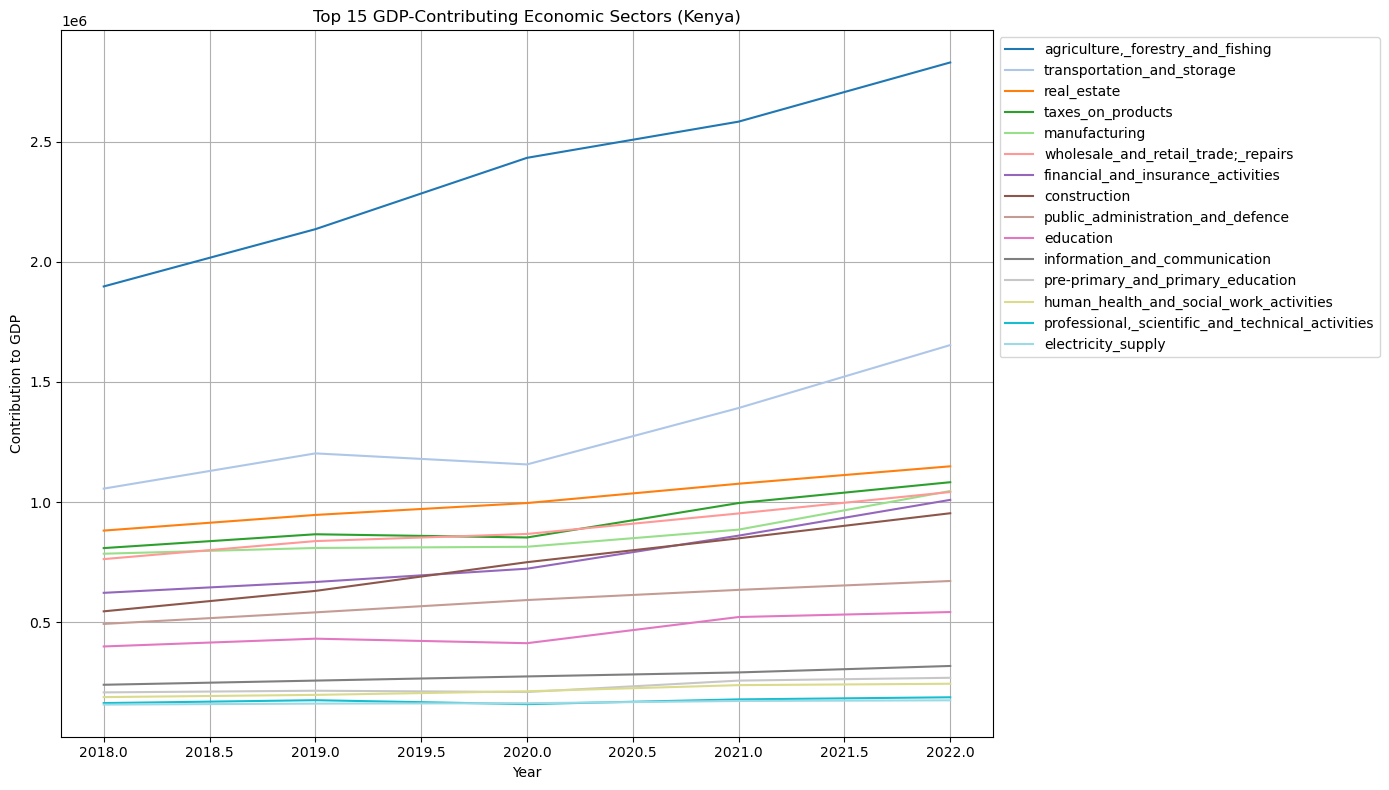

In [43]:
#plotting top 15 contributors to Kenya's GDP

df2 = df2.rename(columns={'industry': 'year'})

df2_plot = df2.set_index('year')


cols_to_exclude = ['gdp_at_market_prices', 'all_economic_activities']
df2_plot = df2_plot.drop(columns=cols_to_exclude, errors='ignore')


df2_latest_year = df2_plot.loc[df2_plot.index.max()]
top_15_cols = df2_latest_year.sort_values(ascending=False).head(15).index.tolist()

plt.figure(figsize=(14, 8))


colors = plt.cm.get_cmap('tab20', len(top_15_cols))

for i, col in enumerate(top_15_cols):
    if col in df2_plot.columns:
        plt.plot(df2_plot.index, df2_plot[col], label=col, color=colors(i))

plt.title('Top 15 GDP-Contributing Economic Sectors (Kenya)')
plt.xlabel('Year')
plt.ylabel('Contribution to GDP')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


Top contributors to Kenya's GDP are agriculture, transporation and storage, real estate, taxes on products, wholesale and retail trade and financial services

Kenya's data does not show major change in trend however this may be due to limited data but this gives us an overview on which sectors to rely on and model

Similarities in sectors between Kenya and Sngapore are what we should focus on such as transporation and storage, wholesale and retail trade financial services and manufacturing

### Correlation Between Sector Growth and Total GDP
Understand which sectors correlate most strongly with GDP growth.

In [44]:
correlations = df[sectors + ['gdp_current_market_prices']].corr()
gdp_corr = correlations['gdp_current_market_prices'].sort_values(ascending=False)
print("Top sectors correlating with total GDP:\n", gdp_corr)


Top sectors correlating with total GDP:
 gdp_current_market_prices          1.000000
finance_insurance                  0.992096
manufacturing                      0.987656
ownership_dwellings                0.987557
utilities                          0.980407
information_communications         0.980348
transportation_storage             0.960762
construction                       0.953443
wholesale_trade                    0.635460
professional_services              0.435844
public_administration_defence      0.411149
health_social_services             0.410988
education                          0.393463
other_services                     0.392942
retail_trade                       0.314033
administrative_support_services    0.290287
accommodation                      0.144130
food_beverage_services             0.133955
real_estate                        0.114537
arts_entertainment_recreation     -0.072324
other_goods_industries            -0.273651
Name: gdp_current_market_prices, dt

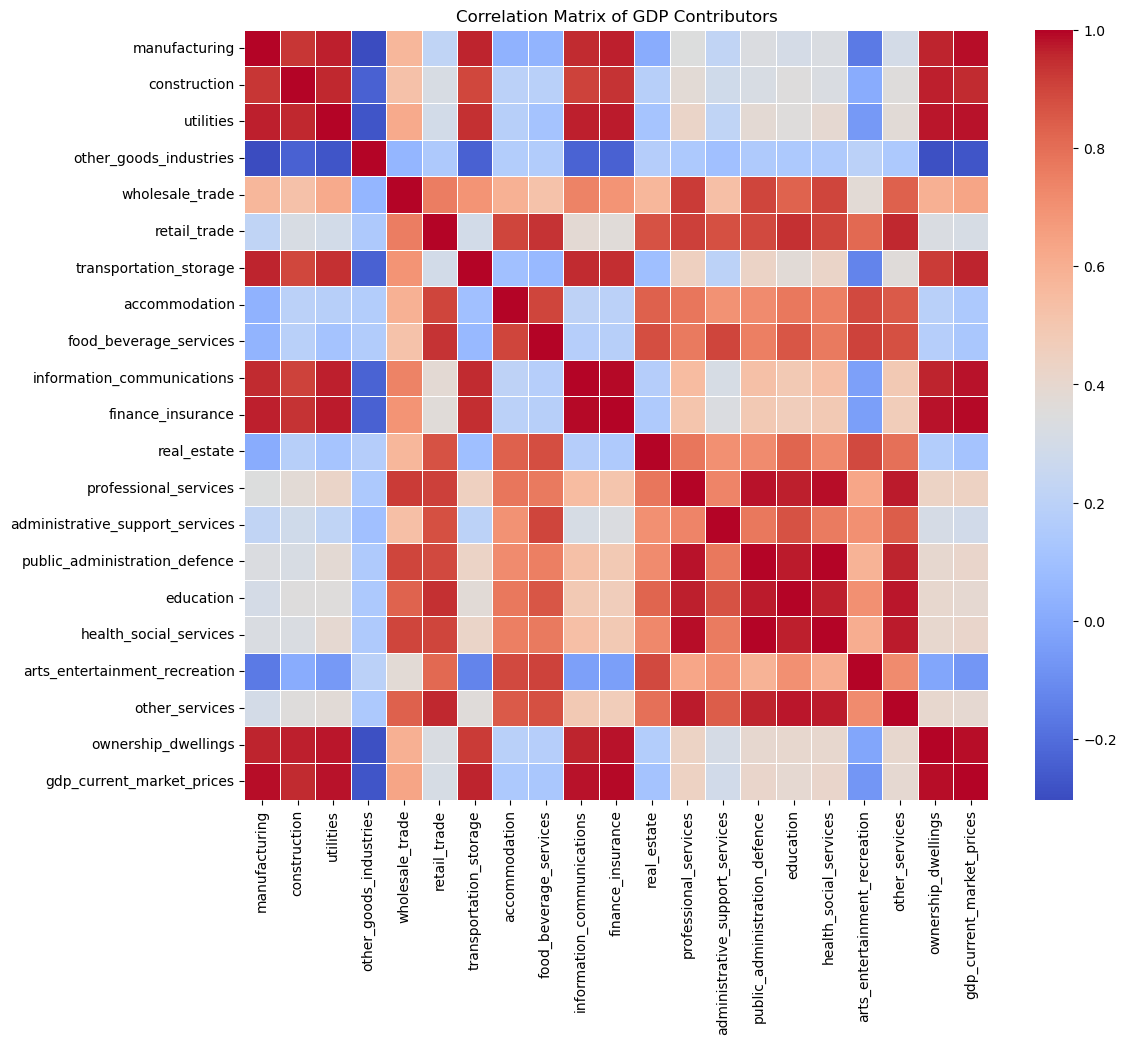

In [45]:
# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlations, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of GDP Contributors")
plt.show()

The correlation matrix shows that sectors like finance, ICT and  manufacturing are strongly linked to GDP, highlighting them as key drivers of economic growth. Other sectors, such as accommodation, arts, and food services, show weaker correlations, suggesting a smaller or more indirect impact on GDP. Overall, the economy appears to rely heavily on high-value service and industrial sectors, while public services and consumer-based sectors contribute more moderately.


Finance, IT, Manufacturing = Core growth sectors in Singapore.

Housing & Infrastructure = Consistent contributors to GDP.

Service-based sectors (food, arts, recreation) = Weaker correlation, likely demand-driven and less GDP-coupled.

Policy Implication: Singapore’s strong investment in finance, tech, and manufacturing has likely delivered compounding returns on GDP — areas Kenya might emulate with tailored industrial and financial sector policies.

### Year-over-Year Sectoral Growth
Compute and visualize growth rates per sector.

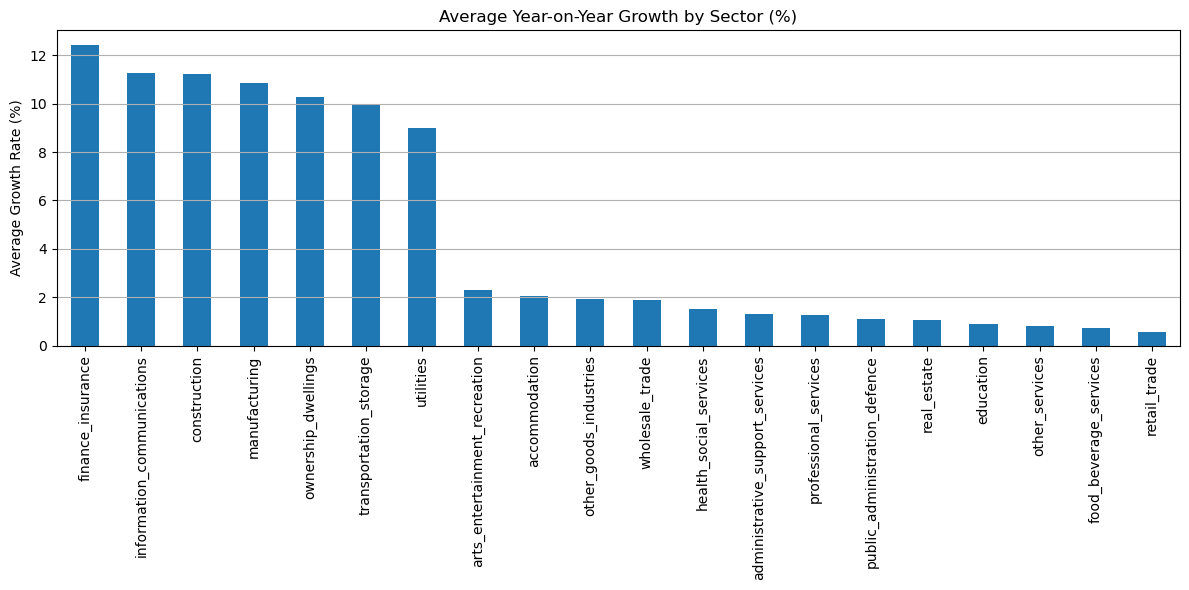

In [46]:
sector_growth = df[['year'] + sectors].copy()
sector_growth.set_index('year', inplace=True)
sector_growth = sector_growth.pct_change() * 100

plt.figure(figsize=(12, 6))
sector_growth[sectors].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Year-on-Year Growth by Sector (%)')
plt.ylabel('Average Growth Rate (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


ICT, finance, transportation, ownership and dwellings seem to have the highest rates of growth per year. This may be related to increase in demand as well as policy.

Through modeling we should be able to identify policies that enhanced such high volumes of average growth over the years

### GDP & Population Over time

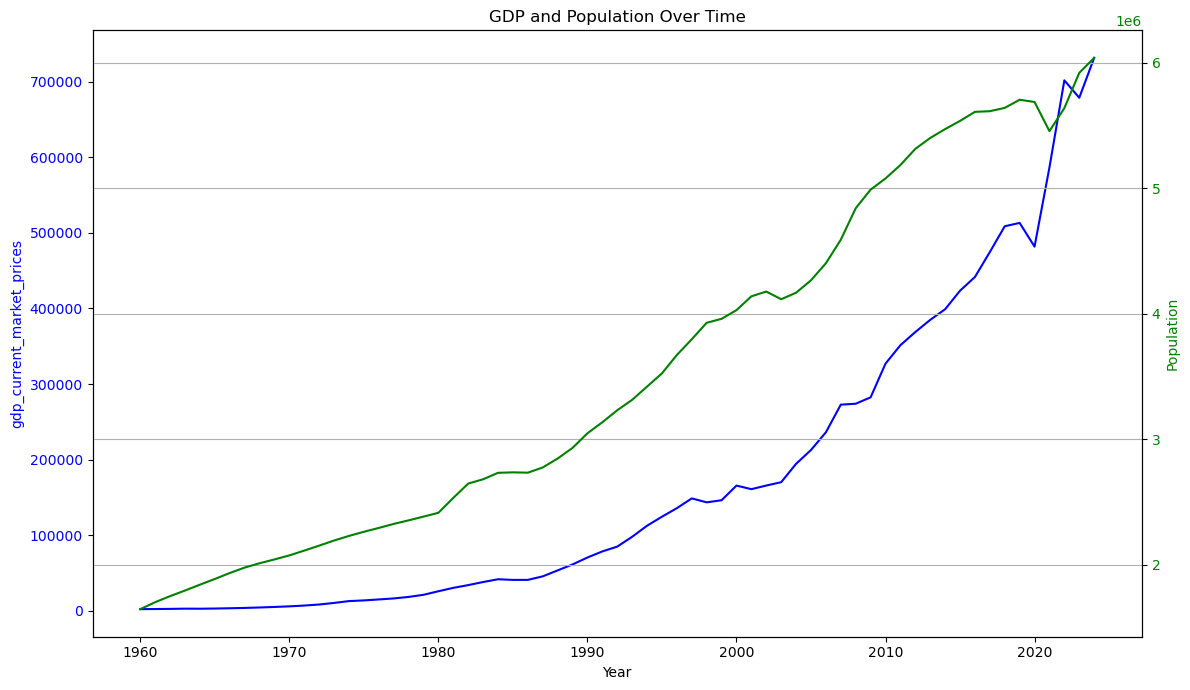

In [47]:
fig, ax1 = plt.subplots(figsize=(12, 7))

ax1.set_xlabel('Year')
ax1.set_ylabel('gdp_current_market_prices', color='blue')
ax1.plot(df['year'], df['gdp_current_market_prices'], color='blue', label='gdp_current_market_prices')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Population', color='green')
ax2.plot(df['year'], df['population'], color='green', label='Population')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('GDP and Population Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()


There is a strong positive correlation between population and GDP

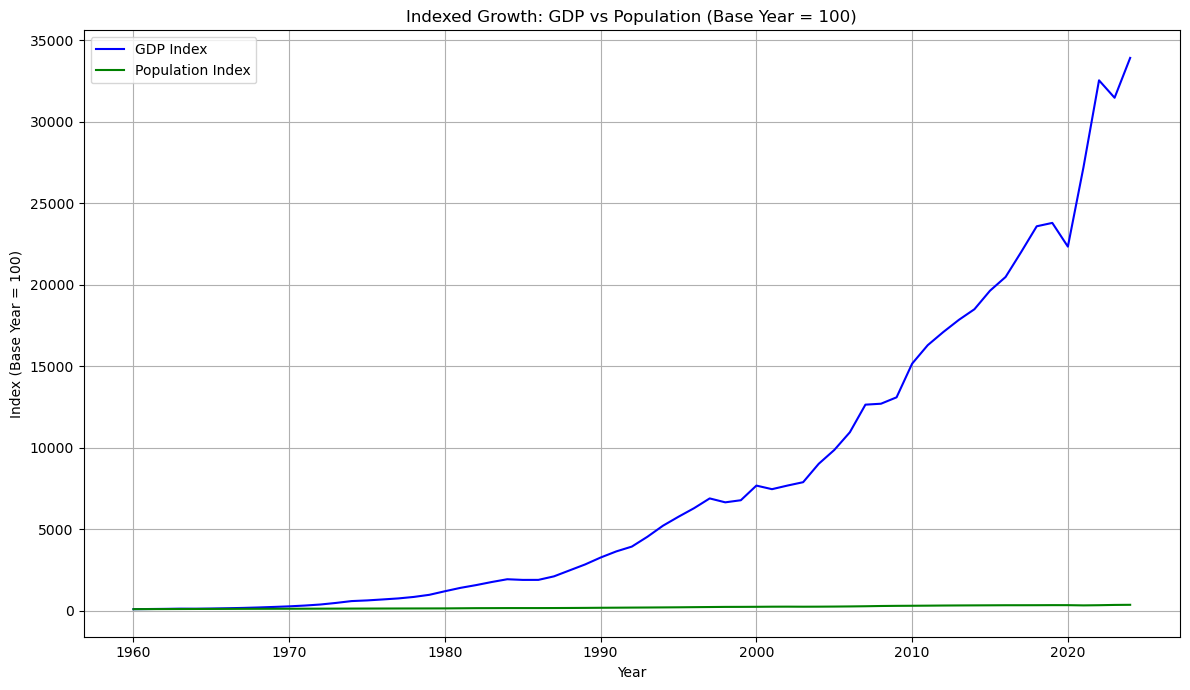

In [48]:
df['gdp_index'] = (df['gdp_current_market_prices'] / df['gdp_current_market_prices'].iloc[0]) * 100
df['pop_index'] = (df['population'] / df['population'].iloc[0]) * 100

plt.figure(figsize=(12, 7))
plt.plot(df['year'], df['gdp_index'], label='GDP Index', color='blue')
plt.plot(df['year'], df['pop_index'], label='Population Index', color='green')
plt.title('Indexed Growth: GDP vs Population (Base Year = 100)')
plt.xlabel('Year')
plt.ylabel('Index (Base Year = 100)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


 Summary:
GDP has grown far more rapidly than the population since the base year -2000

The divergence highlights strong economic performance and potential productivity improvements.

It confirms Singapore's model of high-value industrialization and services-led growth.

If you're comparing to Kenya later, such a chart would be a valuable contrast to assess productivity and policy impacts.

### GDP Per Capita over time

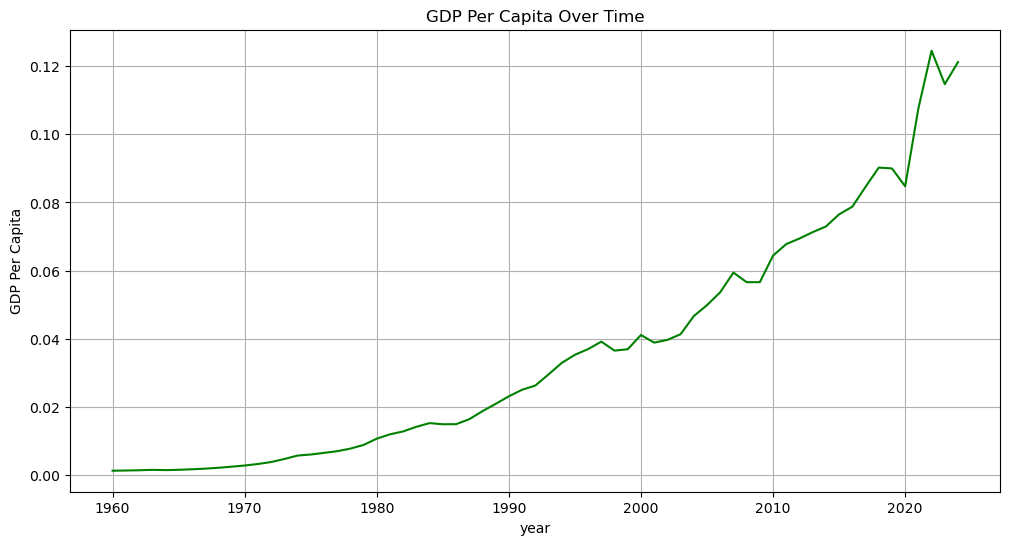

In [49]:
df['GDP_per_Capita'] = df['gdp_current_market_prices'] / df['population']

plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['GDP_per_Capita'], color='green')
plt.title('GDP Per Capita Over Time')
plt.xlabel('year')
plt.ylabel('GDP Per Capita')
plt.grid(True)
plt.show()


Interpretation Summary:
GDP per capita is a proxy for average income and living standards.

Singapore has maintained a long-term positive growth trend.

Short-term shocks (2003, 2020) had temporary effects, followed by strong rebounds, which shows economic resilience and adaptive policy frameworks.

### Comparison between Kenya's GDP & Total Debt with Singapore.

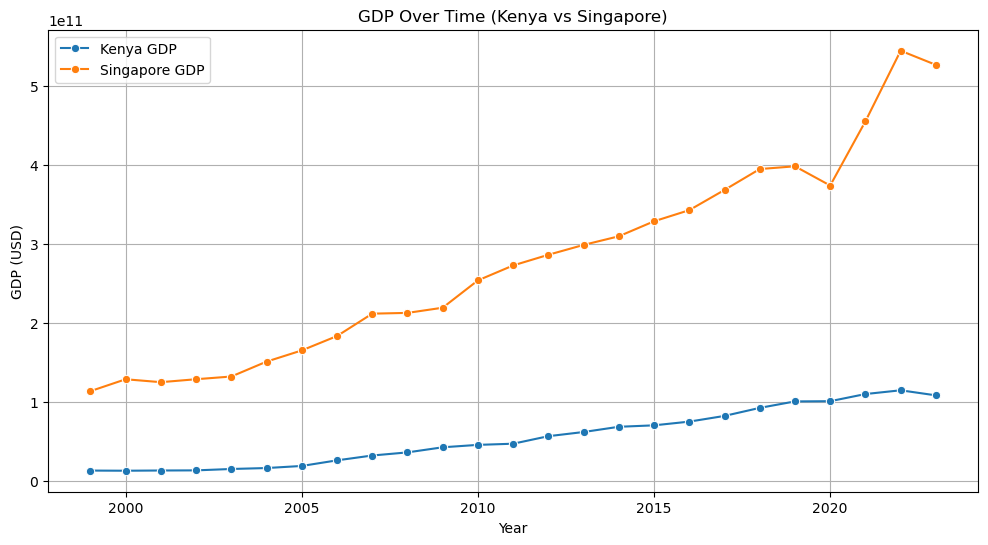

In [50]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, x="Year", y="Kenya_GDP_USD", label="Kenya GDP", marker="o")
sns.lineplot(data=df3, x="Year", y="Singapore_GDP_USD", label="Singapore GDP", marker="o")
plt.title("GDP Over Time (Kenya vs Singapore)")
plt.ylabel("GDP (USD)")
plt.grid(True)
plt.show()


There is huge gap between the 2 countries GDP. This is due to a start year of 1999.

There was a convergence in 1965 and thereafter the gap became evident over time showing the difference in strategies and governance between the 2 countries

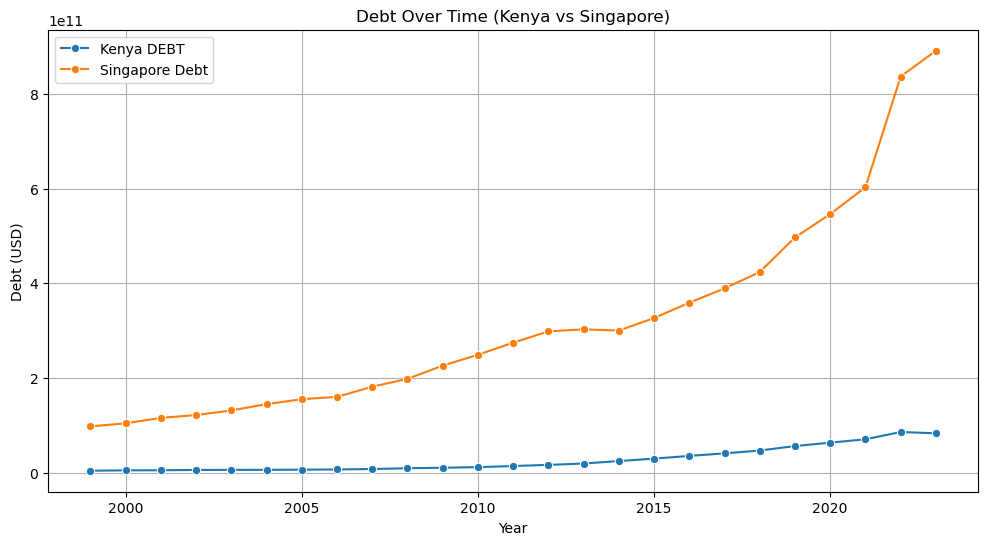

In [51]:
# Step 2: Plot GDP over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df3, x="Year", y="Kenya_Debt_USD", label="Kenya DEBT", marker="o")
sns.lineplot(data=df3, x="Year", y="Singapore_Debt _USD", label="Singapore Debt", marker="o")
plt.title("Debt Over Time (Kenya vs Singapore)")
plt.ylabel("Debt (USD)")
plt.grid(True)
plt.show()


The graph is similar to that of GDP, however Kenya's borrowing is much substantially lower than GDP which may be a good indicator for lower debt to GDP ratio

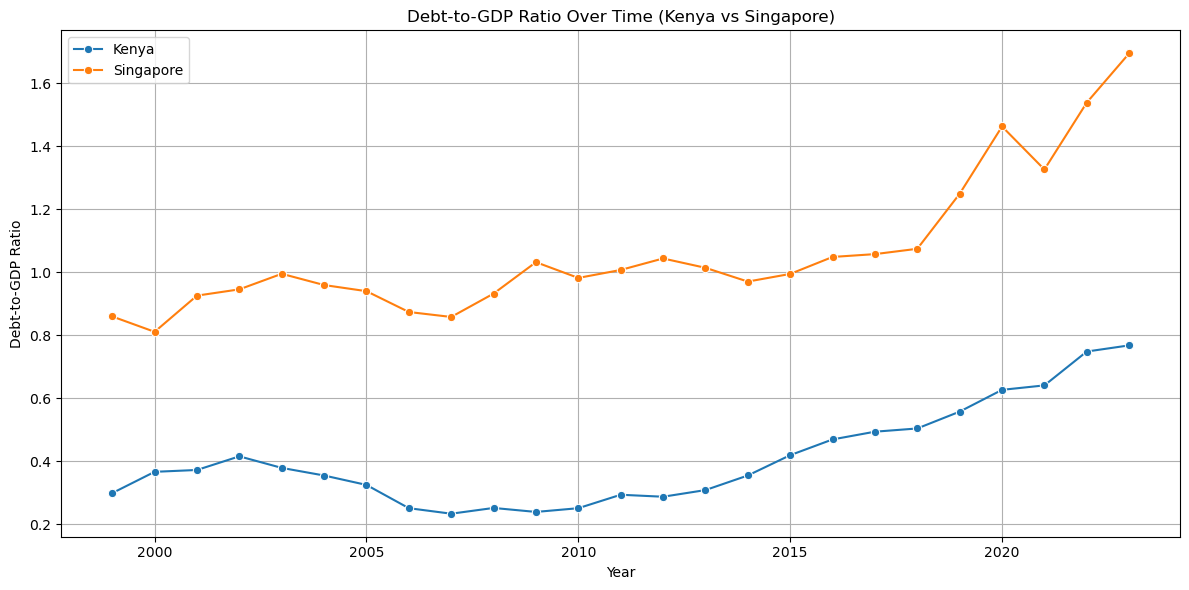

In [52]:
df3["kenya_debt_gdp_ratio"] = df3["Kenya_Debt_USD"] / df3["Kenya_GDP_USD"]
df3["singapore_debt_gdp_ratio"] = df3["Singapore_Debt _USD"] / df3["Singapore_GDP_USD"]



plt.figure(figsize=(12, 6))
sns.lineplot(x=df3["Year"], y=df3["kenya_debt_gdp_ratio"], label="Kenya", marker="o")
sns.lineplot(x=df3["Year"], y=df3["singapore_debt_gdp_ratio"], label="Singapore", marker="o")

plt.title("Debt-to-GDP Ratio Over Time (Kenya vs Singapore)")
plt.xlabel("Year")
plt.ylabel("Debt-to-GDP Ratio")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The trends seem to be similar for both countries despite the obvious gap in values.

Kenya's Debt has not exceeded GDP which is the opposite of Singapore, however these 2 countries are in different classes

Effect of Debt to GDP ratio needs to be studied further

# Preprocessing

Feature Importance

In [53]:
# Scaling the df dataset


cols_to_scale = [col for col in df if col != 'year']


scaler = StandardScaler()


df_scaled = df.copy()


df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])


df_scaled


,year,gdp_current_market_prices,manufacturing,construction,utilities,other_goods_industries,wholesale_trade,retail_trade,transportation_storage,accommodation,...,ownership_dwellings,gross_value_added_basic_prices,taxes_on_products,population,per_capita_income,intermediate_consumption,employment_level,gdp_index,pop_index,GDP_per_Capita
64,1960,-0.859551,-0.944034,-1.011783,-0.951393,-1.158319,-0.183832,0.043554,-0.862255,0.123435,...,-0.839753,-0.859431,-0.854421,-1.374827,2.887100,-0.248806,-0.025613,-0.859551,-1.374827,-1.032455
63,1961,-0.858627,-0.943687,-1.008136,-0.950246,-1.134585,-0.183832,0.043554,-0.861227,0.123435,...,-0.839118,-0.858465,-0.854251,-1.334135,2.719458,-0.248806,-0.025613,-0.858627,-1.334135,-1.030541
62,1962,-0.857676,-0.942872,-1.006615,-0.946726,-1.045841,-0.183832,0.043554,-0.860753,0.123435,...,-0.838752,-0.857494,-0.853657,-1.299401,2.554171,-0.248806,-0.025613,-0.857676,-1.299401,-1.028460
61,1963,-0.856266,-0.941336,-1.003349,-0.945884,-1.040682,-0.183832,0.043554,-0.860360,0.123435,...,-0.838414,-0.856017,-0.853449,-1.266846,2.306463,-0.248806,-0.025613,-0.856266,-1.266846,-1.024910
60,1964,-0.856628,-0.940738,-1.000124,-0.942403,-1.041714,-0.183832,0.043554,-0.861420,0.123435,...,-0.838130,-0.856438,-0.852770,-1.232984,2.464515,-0.248806,-0.025613,-0.856628,-1.232984,-1.027240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020,1.558136,1.596864,0.531081,1.421137,-0.351371,0.966748,-1.040341,0.989438,-1.807161,...,1.691709,1.575574,1.235874,1.560428,-0.627587,1.762009,1.396684,1.558136,1.560428,1.440392
3,2021,2.086408,2.305390,1.370697,1.460808,-0.133639,2.201092,0.310321,2.438190,-2.117656,...,1.709389,2.090040,2.004405,1.391669,-0.639303,2.596147,1.439394,2.086408,1.391669,2.116974
2,2022,2.667200,2.760325,1.958358,2.166431,-0.101650,4.024431,1.861057,4.154261,0.346883,...,1.923917,2.695929,2.135434,1.524978,-0.645221,3.505785,1.863719,2.667200,1.524978,2.619083
1,2023,2.550860,2.149022,2.361566,3.260041,0.037657,3.623051,2.513617,2.170878,2.734083,...,2.570209,2.556888,2.422468,1.728897,-0.642009,3.274008,2.021191,2.550860,1.728897,2.328470


In [54]:
#  Defining the target and predictors
target = 'gdp_current_market_prices'
production_predictors = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications', 'finance_insurance',
    'real_estate', 'professional_services', 'administrative_support_services',
    'public_administration_defence', 'education', 'health_social_services',
    'arts_entertainment_recreation', 'other_services', 'ownership_dwellings'
]

df_defined = df_scaled.copy()
df_defined[production_predictors + [target]] = df_scaled[production_predictors + [target]].apply(pd.to_numeric, errors='coerce')
df_defined = df_defined.dropna(subset=[target] + production_predictors)
df_defined.set_index('year', inplace=True)
df_defined.sort_index(inplace=True)

In [55]:

all_columns = [
    'year', 'gdp_current_market_prices', 'manufacturing', 'construction',
    'utilities', 'other_goods_industries', 'wholesale_trade',
    'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications',
    'finance_insurance', 'real_estate', 'professional_services',
    'administrative_support_services', 'public_administration_defence',
    'education', 'health_social_services', 'arts_entertainment_recreation',
    'other_services', 'ownership_dwellings',
    'gross_value_added_basic_prices', 'taxes_on_products', 'population',
    'per_capita_income', 'intermediate_consumption', 'employment_level'
]


non_contributors = [
    'year', 'gdp_current_market_prices', 'gross_value_added_basic_prices',
    'taxes_on_products', 'population', 'per_capita_income',
    'intermediate_consumption', 'employment_level'
]


gdp_contributors = [col for col in all_columns if col not in non_contributors]

df_contributors = df[gdp_contributors]


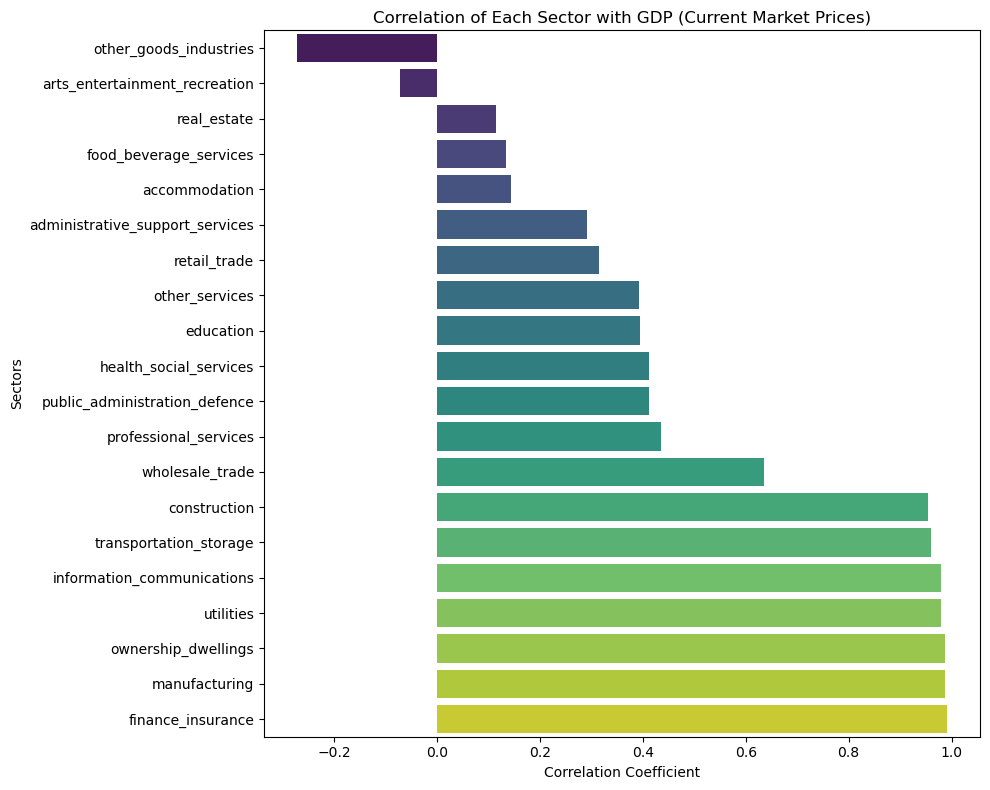

In [56]:
df_corr = df_contributors.copy()
df_corr['gdp'] = df['gdp_current_market_prices']

# Compute correlation
correlation = df_corr.corr()['gdp'].drop('gdp').sort_values()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title('Correlation of Each Sector with GDP (Current Market Prices)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Sectors')
plt.tight_layout()
plt.show()


In [57]:
#  Defining the target and predictors
target = 'gdp_current_market_prices'
production_predictors = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications', 'finance_insurance',
    'real_estate', 'professional_services', 'administrative_support_services',
    'public_administration_defence', 'education', 'health_social_services',
    'arts_entertainment_recreation', 'other_services', 'ownership_dwellings'
]


df[production_predictors + [target]] = df[production_predictors + [target]].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=[target] + production_predictors)
df.set_index('year', inplace=True)
df.sort_index(inplace=True)

In [58]:
# Defining features and target
features = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications', 'finance_insurance',
    'real_estate', 'professional_services', 'administrative_support_services',
    'public_administration_defence', 'education', 'health_social_services',
    'arts_entertainment_recreation', 'other_services', 'ownership_dwellings'
]
target = 'gdp_current_market_prices'


X_raw = df[production_predictors].values
y_raw = df[[target]].values
years_all = df.index.values

In [59]:
# Standardisation
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_raw)
y_scaled = scaler_y.fit_transform(y_raw)

In [60]:

# --- Sequence creation
def create_sequences(X, y, years, n_steps):
    Xs, ys, yr = [], [], []
    for i in range(n_steps, len(X)):
        Xs.append(X[i-n_steps:i])
        ys.append(y[i])
        yr.append(years[i])
    return np.array(Xs), np.array(ys), np.array(yr)

n_steps = 3
X, y, years_seq = create_sequences(X_scaled, y_scaled, years_all, n_steps)

In [61]:
# Performing a Train-test split
X_train, X_val, y_train, y_val, years_train, years_val = train_test_split(
    X, y, years_seq, test_size=0.2, random_state=42
)


In [62]:
# training set from 1960 to 2024
X_full = df[production_predictors]
y_full = df[target]


scaler = StandardScaler()
X_full_scaled = scaler.fit_transform(X_full)

In [63]:
# Identifying to 5 correlators to gdp
target = 'gdp_current_market_prices'
all_predictors = ['manufacturing', 'construction', 'utilities', 'other_goods_industries',
                  'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
                  'food_beverage_services', 'information_communications', 'finance_insurance',
                  'real_estate', 'professional_services', 'administrative_support_services',
                  'public_administration_defence', 'education', 'health_social_services',
                  'arts_entertainment_recreation', 'other_services', 'ownership_dwellings']


correlations = df[all_predictors].corrwith(df[target]).abs().sort_values(ascending=False)
top_predictors = correlations.head(5).index.tolist()


var_data = df[[target] + top_predictors].copy()
print(f"Using predictors: {top_predictors}")
print(f"Data shape: {var_data.shape}")


train = var_data.iloc[-25:-5]
test = var_data.iloc[-5:]


scaler = StandardScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

Using predictors: ['finance_insurance', 'manufacturing', 'ownership_dwellings', 'utilities', 'information_communications']
Data shape: (65, 6)


In [64]:
# Defining full list of desired GDP columns
gdp_columns = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications', 'finance_insurance',
    'real_estate', 'professional_services', 'administrative_support_services',
    'public_administration_defence', 'education', 'health_social_services',
    'arts_entertainment_recreation', 'other_services', 'ownership_dwellings',
    'intermediate_consumption'
]


existing_gdp_columns = [col for col in gdp_columns if col in df.columns]


gdp_data = df[existing_gdp_columns].copy()


In [65]:



scaler = MinMaxScaler()
scaled_gdp = scaler.fit_transform(gdp_data)


def create_multi_step_sequences(data, window, n_future):
    X, y = [], []
    for i in range(len(data) - window - n_future + 1):
        X.append(data[i:i+window])
        y_seq = data[i+window:i+window+n_future].reshape(-1)
        y.append(y_seq)
    return np.array(X), np.array(y)

window = 5
n_future = 5

X, y = create_multi_step_sequences(scaled_gdp, window, n_future)

print(f"Input shape: {X.shape}, Target shape: {y.shape}")



Input shape: (56, 5, 21), Target shape: (56, 105)


In [66]:
df = df.sort_values('year')


years_actual = df.index.values
n_future = 5
years_pred = np.arange(years_actual[-1] + 1, years_actual[-1] + n_future + 1)


In [67]:
# Define features and target
# Using the same features and target as the previous regression models
features = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications', 'finance_insurance',
    'real_estate', 'professional_services', 'administrative_support_services',
    'public_administration_defence', 'education', 'health_social_services',
    'arts_entertainment_recreation', 'other_services', 'ownership_dwellings'
]
target = 'gdp_current_market_prices'


df[features + [target]] = df[features + [target]].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=[target] + features)


X = df[features]
y = df[target]

In [68]:
# support vector regression with visualization

features = [
    'manufacturing', 'construction', 'utilities', 'other_goods_industries',
    'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications', 'finance_insurance',
    'real_estate', 'professional_services', 'administrative_support_services',
    'public_administration_defence', 'education', 'health_social_services',
    'arts_entertainment_recreation', 'other_services', 'ownership_dwellings'
]
target = 'gdp_current_market_prices'


df[features + [target]] = df[features + [target]].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=[target] + features)

X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)


y_train_reshaped = y_train.values.reshape(-1, 1)
y_test_reshaped = y_test.values.reshape(-1, 1)

y_train_scaled = scaler_y.fit_transform(y_train_reshaped)
y_test_scaled = scaler_y.transform(y_test_reshaped)

y
y_train_scaled_flat = y_train_scaled.flatten()
y_test_scaled_flat = y_test_scaled.flatten()


# Modeling

## Base Models

In [69]:
# Multiple linear Regression on highest correlators

if not pd.api.types.is_numeric_dtype(df['gdp_current_market_prices']):
    print("Warning: 'gdp_current_market_prices' is not numeric. Please check data cleaning.")

    df['gdp_current_market_prices'] = pd.to_numeric(df['gdp_current_market_prices'], errors='coerce')


exclusion_list = [
    'year', 'gdp_current_market_prices', 'gross_value_added_basic_prices',
    'taxes_on_products', 'population', 'per_capita_income',
    'intermediate_consumption', 'employment_level']
temp_df = df.drop(columns=exclusion_list, errors='ignore')

correlation_matrix = df.select_dtypes(include='number').corr()
gdp_correlations = correlation_matrix['gdp_current_market_prices'].drop(exclusion_list, errors='ignore').sort_values(ascending=False)

print("\n--- Correlations with GDP (Excluding Specified Columns) ---")
print(gdp_correlations)


top_5_correlators = gdp_correlations.abs().sort_values(ascending=False).head(5).index.tolist()

print(f"\n--- Top 5 Correlators to GDP: {top_5_correlators} ---")


X_top5 = df_scaled[top_5_correlators]
y_top5 = df_scaled[target]


X_train_top5, X_test_top5, y_train_top5, y_test_top5 = train_test_split(X_top5, y_top5, test_size=0.2, random_state=42)


X_train_sm_top5 = sm.add_constant(X_train_top5)


regression_model_top5 = sm.OLS(y_train_top5, X_train_sm_top5).fit()


print("\n--- Multiple Regression Model Summary (Top 5 Correlators) ---")
print(regression_model_top5.summary())


X_test_sm_top5 = sm.add_constant(X_test_top5)


y_pred_top5 = regression_model_top5.predict(X_test_sm_top5)


mse_top5 = mean_squared_error(y_test_top5, y_pred_top5)
rmse_top5 = sqrt(mse_top5)
r2_test_top5 = r2_score(y_test_top5, y_pred_top5)

print(f"\nMean Squared Error (MSE) on Test Set (Top 5 Correlators): {mse_top5:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set (Top 5 Correlators): {rmse_top5:.4f}")
print(f"R-squared on Test Set (Top 5 Correlators): {r2_test_top5:.4f}")


--- Correlations with GDP (Excluding Specified Columns) ---
gdp_index                          1.000000
finance_insurance                  0.992096
GDP_per_Capita                     0.990687
manufacturing                      0.987656
ownership_dwellings                0.987557
utilities                          0.980407
information_communications         0.980348
transportation_storage             0.960762
construction                       0.953443
pop_index                          0.937112
wholesale_trade                    0.635460
professional_services              0.435844
public_administration_defence      0.411149
health_social_services             0.410988
education                          0.393463
other_services                     0.392942
retail_trade                       0.314033
administrative_support_services    0.290287
accommodation                      0.144130
food_beverage_services             0.133955
real_estate                        0.114537
arts_entertainm

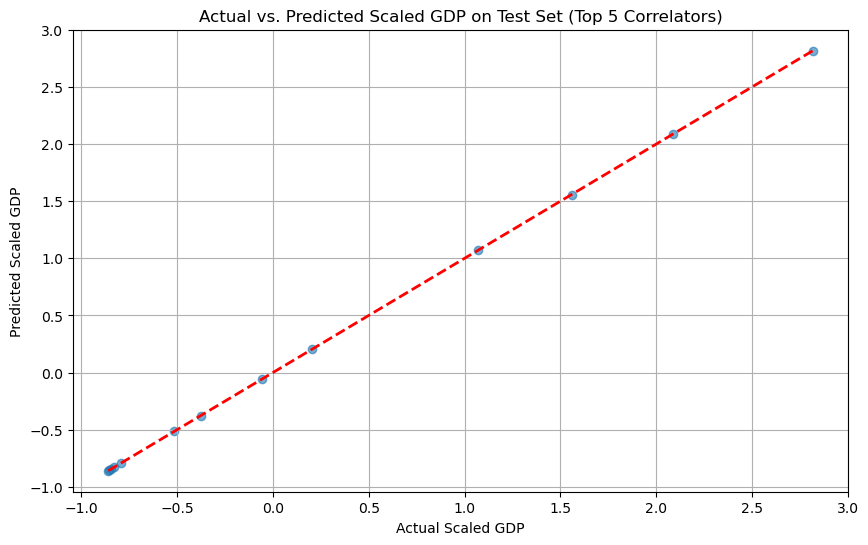

In [70]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_top5, y_pred_top5, alpha=0.6)
plt.plot([y_test_top5.min(), y_test_top5.max()], [y_test_top5.min(), y_test_top5.max()], 'r--', lw=2)
plt.xlabel('Actual Scaled GDP')
plt.ylabel('Predicted Scaled GDP')
plt.title('Actual vs. Predicted Scaled GDP on Test Set (Top 5 Correlators)')
plt.grid(True)
plt.show()

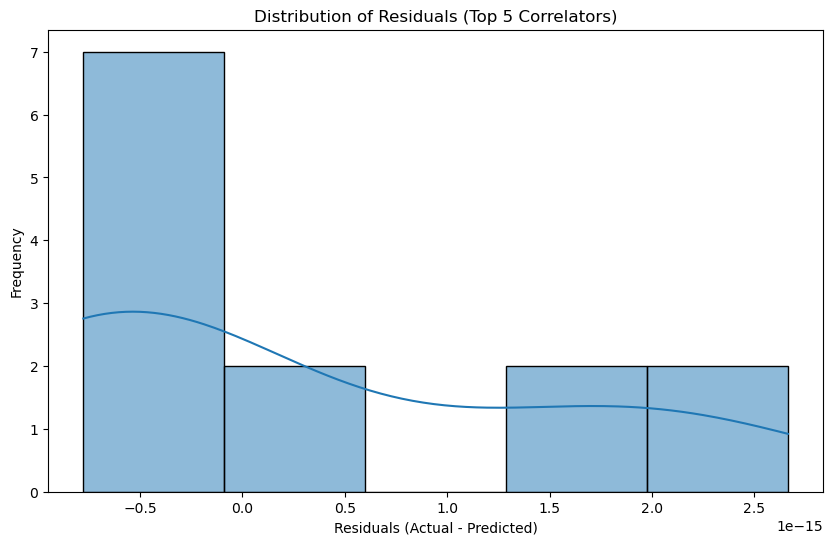

In [71]:
residuals_top5 = y_test_top5 - y_pred_top5

plt.figure(figsize=(10, 6))
sns.histplot(residuals_top5, kde=True)
plt.title('Distribution of Residuals (Top 5 Correlators)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

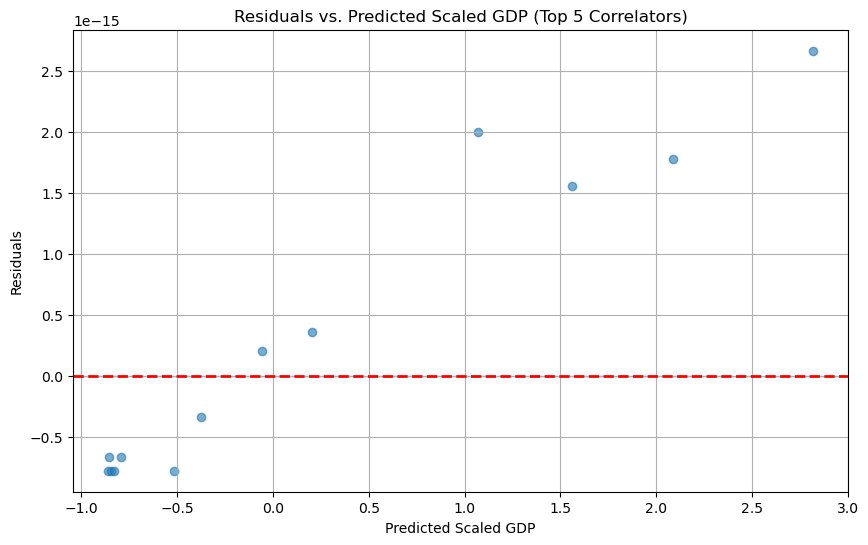

In [72]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_top5, residuals_top5, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Scaled GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Scaled GDP (Top 5 Correlators)')
plt.grid(True)
plt.show()

The top 5 correlators are finance and insurance, information and communication, manufacturing,ownership and dwellings and utilities. This however has to be compared to what is relevant to the Kenyan economy

The R-squared gives a value of upto 99.3% which means a very high accuracy and few errors. The MSE and RMSE also give very low values of error at 0.0073 and 0.0855. The p value is below 0.05 therefore the model is significant and able to train on new data.

More details on the co-relating sectors should be identified in order to provide insights on the contributions of each sector to GDP

In [73]:
# multiple linear regression on sectors that are most highly correlated with Kenya's economy


features = ['wholesale_trade', 'transportation_storage','finance_insurance', 'manufacturing']
target = 'gdp_current_market_prices'


valid_features = [f for f in features if f in df_scaled.columns]
if len(valid_features) != len(features):
    print(f"Warning: Some features not found in df_scaled. Using only: {valid_features}")
    features = valid_features

if target not in df_scaled.columns:
    print(f"Error: Target variable '{target}' not found in df_scaled.")
else:

    X = df_scaled[features]
    y = df_scaled[target]


    X = sm.add_constant(X)


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #
    model = sm.OLS(y_train, X_train).fit()


    y_pred = model.predict(X_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = sqrt(mse)
    r_squared = r2_score(y_test, y_pred)

    print("Multiple Linear Regression Results:")
    print(model.summary())
    print(f"\nMean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared: {r_squared:.4f}")

Multiple Linear Regression Results:
                                OLS Regression Results                               
Dep. Variable:     gdp_current_market_prices   R-squared:                       0.997
Model:                                   OLS   Adj. R-squared:                  0.997
Method:                        Least Squares   F-statistic:                     3682.
Date:                       Wed, 04 Jun 2025   Prob (F-statistic):           4.99e-58
Time:                               14:06:57   Log-Likelihood:                 79.456
No. Observations:                         52   AIC:                            -148.9
Df Residuals:                             47   BIC:                            -139.2
Df Model:                                  4                                         
Covariance Type:                   nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------

The model has very high performance with upto 99.32% accuracy, predictions are off by 0.0101 squared units and predictions are off by about 0.1006 units on average

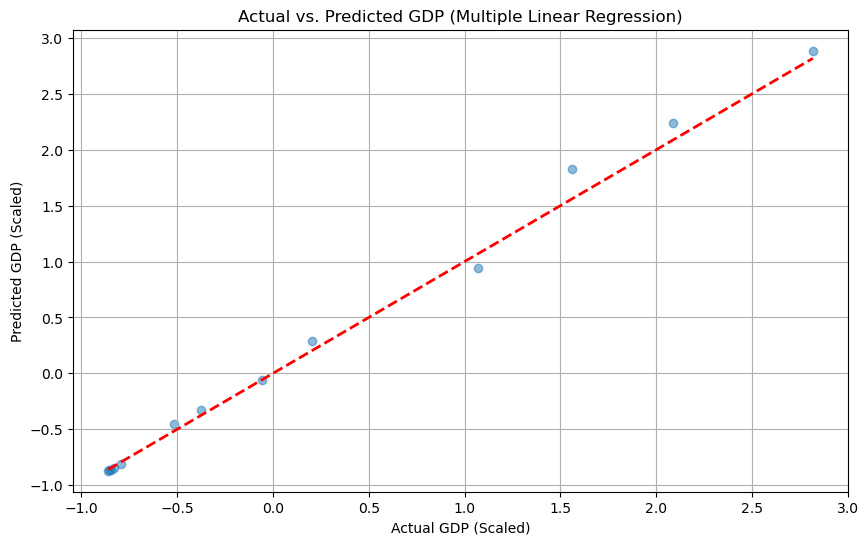

In [74]:
# Plotting the actual vs predicted values for the multiple linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual GDP (Scaled)")
plt.ylabel("Predicted GDP (Scaled)")
plt.title("Actual vs. Predicted GDP (Multiple Linear Regression)")
plt.grid(True)
plt.show()

### Cobb Douglas Model

 Goal to
Estimate a Cobb-Douglas Production Function for Singapore:

𝑌
=
𝐴
⋅
𝐾
𝛼
⋅
𝐿
𝛽
Y=A⋅K
α
 ⋅L
β

Where:

𝑌
Y = GDP (gdp_current_market_prices)

𝐾
K = Capital (we will use intermediate_consumption as a proxy for capital input)

𝐿
L = Labor (employment_level)

𝐴
A = Total Factor Productivity (TFP)

𝛼
α,
𝛽
β = Output elasticities of capital and labor (to be estimated)

In [75]:


# Log-transforming the variables
df['log_Y'] = np.log(df['gdp_current_market_prices'])
df['log_K'] = np.log(df['intermediate_consumption'])
df['log_L'] = np.log(df['employment_level'])


X = df[['log_K', 'log_L']]
X = sm.add_constant(X)
y = df['log_Y']


Fit the Cobb-Douglas Model
We use linear regression on the log-linear form of the function.

In [76]:
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  log_Y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     4.379
Date:                Wed, 04 Jun 2025   Prob (F-statistic):             0.0166
Time:                        14:06:57   Log-Likelihood:                -125.12
No. Observations:                  65   AIC:                             256.2
Df Residuals:                      62   BIC:                             262.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7372     14.610      0.256      0.7


*   Singapore’s Growth is Labor-Driven


The dominance of labor elasticity suggests Singapore’s GDP growth is driven more by employment and workforce quality than by raw capital accumulation.

Likely reflects Singapore’s investment in human capital, high labor productivity, and strong services sector.

Performing a PCA to identify sectors with the most variance over time

In [77]:
columns_to_drop = ['gdp_index', 'pop_index', 'GDP_per_Capita']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [78]:
columns_to_drop = [
    'gdp_current_market_prices', 'population', 'per_capita_income',
    'intermediate_consumption', 'employment_level',
    'gross_value_added_basic_prices', 'taxes_on_products'
]

df_pca_input = df_scaled.drop(columns=columns_to_drop, errors='ignore')

In [79]:
print(df_pca_input.columns.tolist())

['year', 'manufacturing', 'construction', 'utilities', 'other_goods_industries', 'wholesale_trade', 'retail_trade', 'transportation_storage', 'accommodation', 'food_beverage_services', 'information_communications', 'finance_insurance', 'real_estate', 'professional_services', 'administrative_support_services', 'public_administration_defence', 'education', 'health_social_services', 'arts_entertainment_recreation', 'other_services', 'ownership_dwellings', 'gdp_index', 'pop_index', 'GDP_per_Capita']


In [80]:
columns_to_drop = [
    'gdp_current_market_prices', 'population', 'per_capita_income',
    'intermediate_consumption', 'employment_level',
    'gross_value_added_basic_prices', 'taxes_on_products'
]

df_pca_input = df_scaled.drop(columns=columns_to_drop, errors='ignore')


In [81]:
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(df_pca_input)


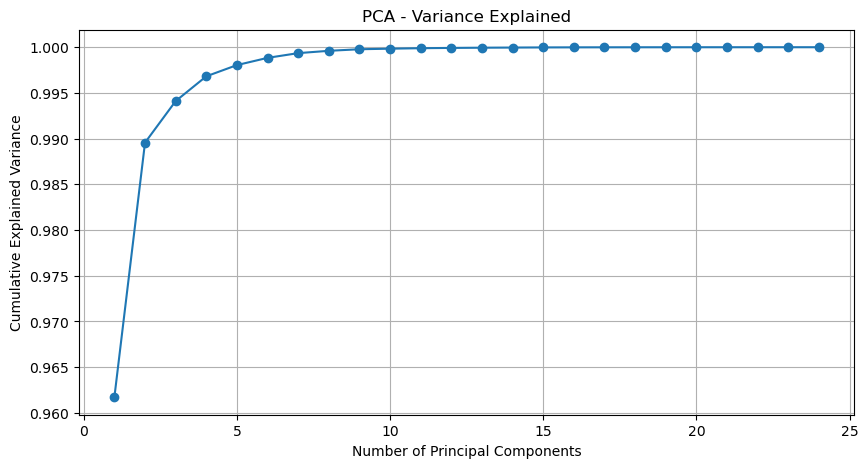

In [82]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.grid(True)
plt.show()


The above key sectors show the least uncorrelated values within the production dataset. With PC1 components explaining 76% of the variance and PC2 explaining 14% of the variance. More study needs to be done for the sectors to determine why such huge variance and what inferences can be drawn from these sectors

## Machine learning Models

Random Forest Regressor

In [83]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\n--- Random Forest Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE) on Test Set: {mse_rf:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_rf:.4f}")
print(f"R-squared on Test Set: {r2_rf:.4f}")


--- Random Forest Regressor Model Evaluation ---
Mean Squared Error (MSE) on Test Set: 1.7243
Root Mean Squared Error (RMSE) on Test Set: 1.3131
R-squared on Test Set: 0.5853


The above does not have a very good result with low values oof r-squared (accuracy) - 58% and high errors from the values shown in MSE and RMSE

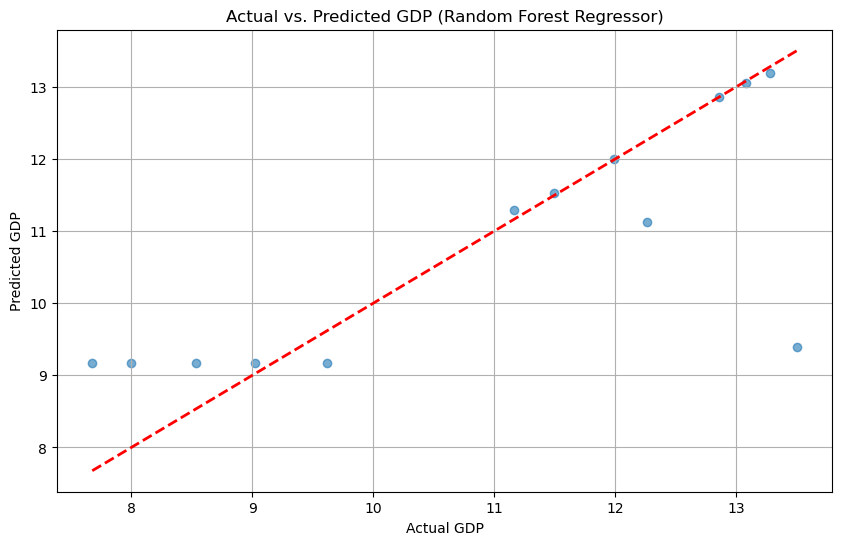

In [84]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP (Random Forest Regressor)')
plt.grid(True)
plt.show()

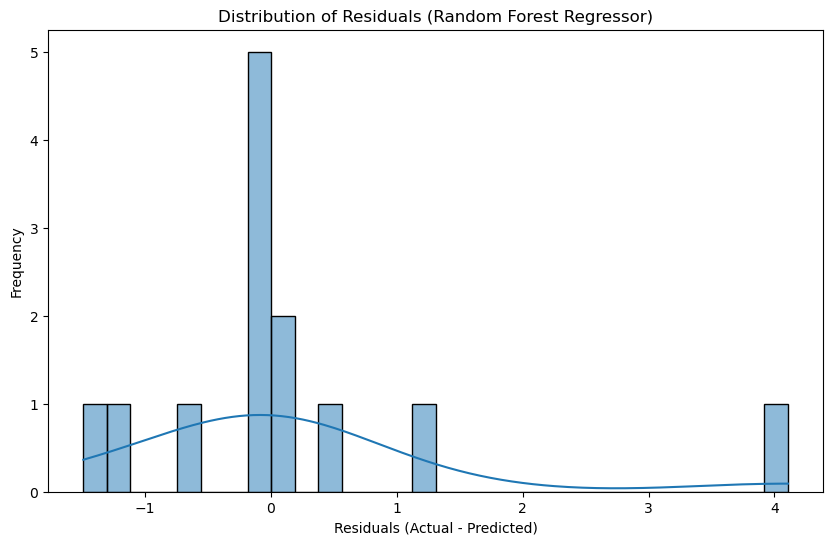

In [85]:

residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.title('Distribution of Residuals (Random Forest Regressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


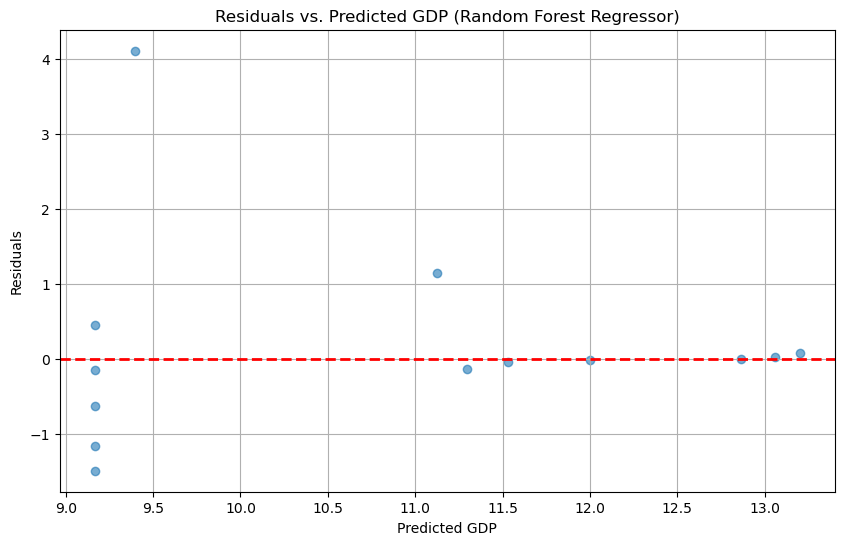

In [86]:
# Residuals vs. Predicted Plot - Check for heteroscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf, residuals_rf, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted GDP (Random Forest Regressor)')
plt.grid(True)
plt.show()

Gradient boosting machine with visualization

In [87]:


gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_model.fit(X_train, y_train)


y_pred_gbr = gbr_model.predict(X_test)


mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\n--- Gradient Boosting Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE) on Test Set: {mse_gbr:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_gbr:.4f}")
print(f"R-squared on Test Set: {r2_gbr:.4f}")


--- Gradient Boosting Regressor Model Evaluation ---
Mean Squared Error (MSE) on Test Set: 1.7768
Root Mean Squared Error (RMSE) on Test Set: 1.3330
R-squared on Test Set: 0.5727


The Gradient Boost Regresor also has similar performance to the random forest regressor. More models and tuning should be done for better outcome

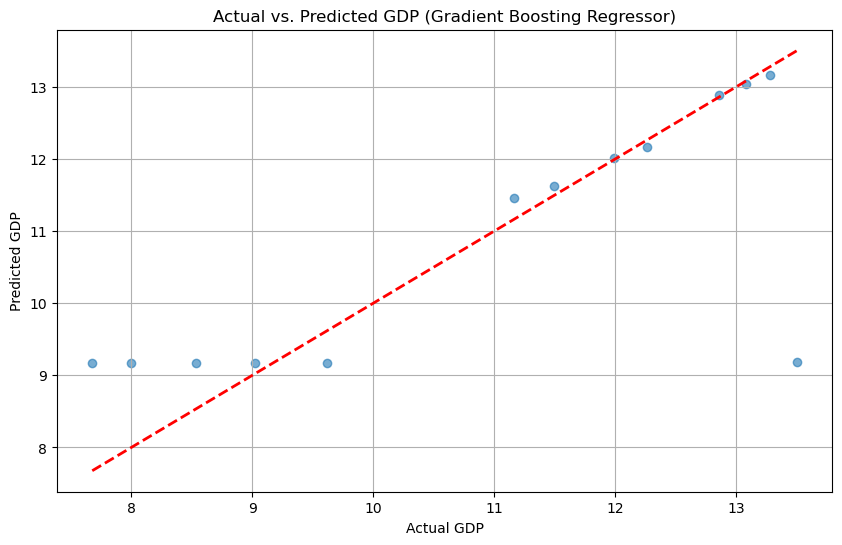

In [88]:
# Visualization

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gbr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP (Gradient Boosting Regressor)')
plt.grid(True)
plt.show()


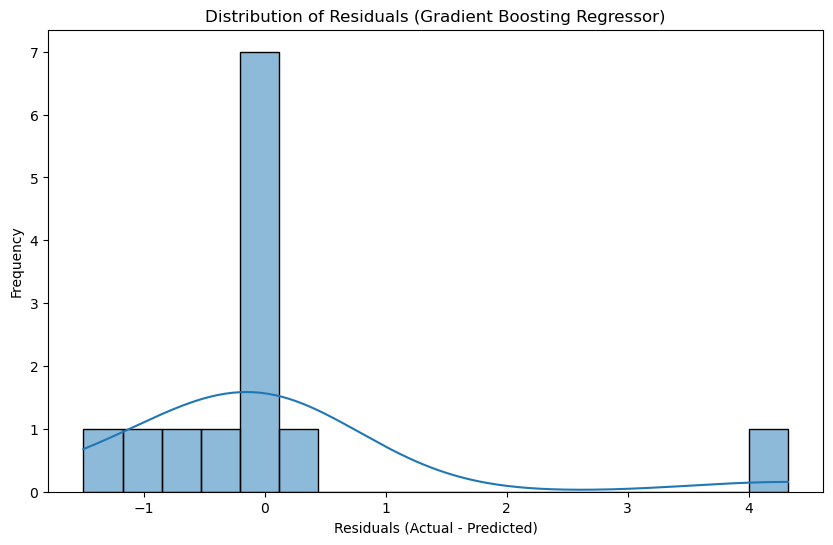

In [89]:
# Residuals Plot
residuals_gbr = y_test - y_pred_gbr

plt.figure(figsize=(10, 6))
sns.histplot(residuals_gbr, kde=True)
plt.title('Distribution of Residuals (Gradient Boosting Regressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


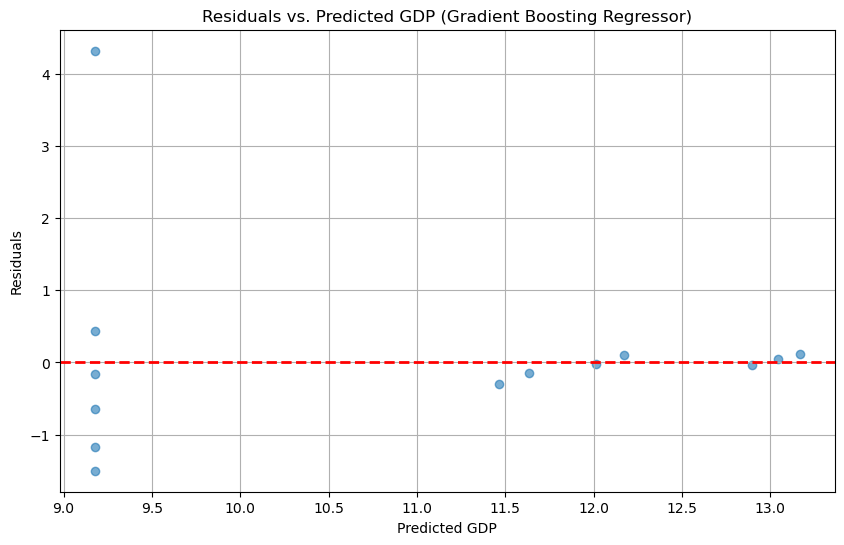

In [90]:

# Residuals vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_gbr, residuals_gbr, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted GDP (Gradient Boosting Regressor)')
plt.grid(True)
plt.show()


support vector regression with visualization

In [91]:

svr_model = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_model.fit(X_train_scaled, y_train_scaled_flat)


y_pred_scaled = svr_model.predict(X_test_scaled)


y_pred_svr = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_orig = scaler_y.inverse_transform(y_test_scaled).flatten()


mse_svr = mean_squared_error(y_test_orig, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test_orig, y_pred_svr)
mae_svr = mean_absolute_error(y_test_orig, y_pred_svr)


print("\n--- Support Vector Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE) on Test Set: {mse_svr:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_svr:.4f}")
print(f"Mean Absolute Error (MAE) on Test Set: {mae_svr:.4f}")
print(f"R-squared on Test Set: {r2_svr:.4f}")


--- Support Vector Regressor Model Evaluation ---
Mean Squared Error (MSE) on Test Set: 7669474930.9371
Root Mean Squared Error (RMSE) on Test Set: 87575.5384
Mean Absolute Error (MAE) on Test Set: 53896.1803
R-squared on Test Set: 0.8687


SVR has better parameters with an R-squared value of 86% and absolute values of MSE and RMSE

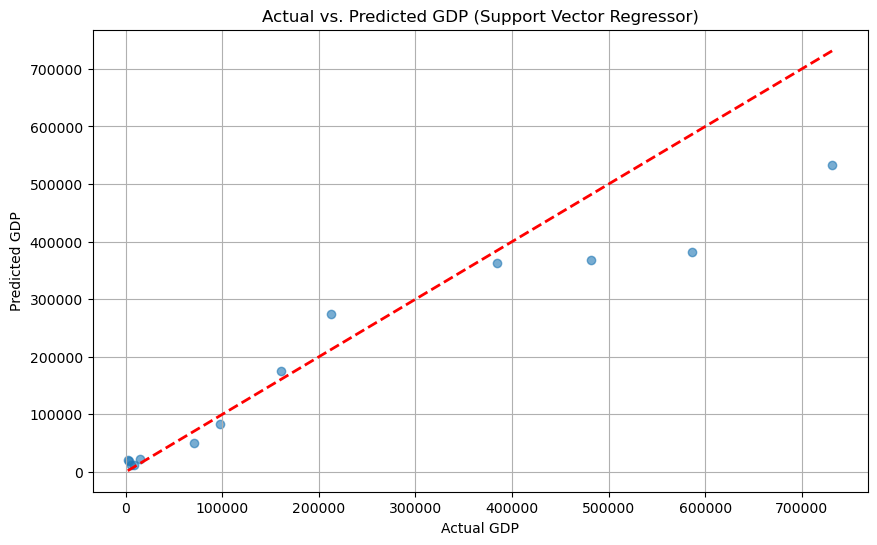

In [92]:
# Visualization

plt.figure(figsize=(10, 6))
plt.scatter(y_test_orig, y_pred_svr, alpha=0.6)

min_val = min(y_test_orig.min(), y_pred_svr.min())
max_val = max(y_test_orig.max(), y_pred_svr.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP (Support Vector Regressor)')
plt.grid(True)
plt.show()


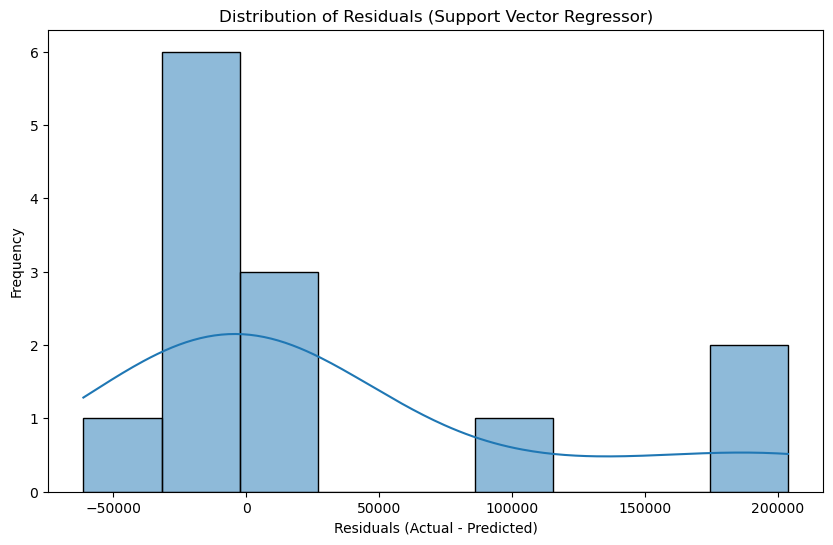

In [93]:
# Residuals Plot
residuals_svr = y_test_orig - y_pred_svr.flatten()

plt.figure(figsize=(10, 6))
sns.histplot(residuals_svr, kde=True)
plt.title('Distribution of Residuals (Support Vector Regressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

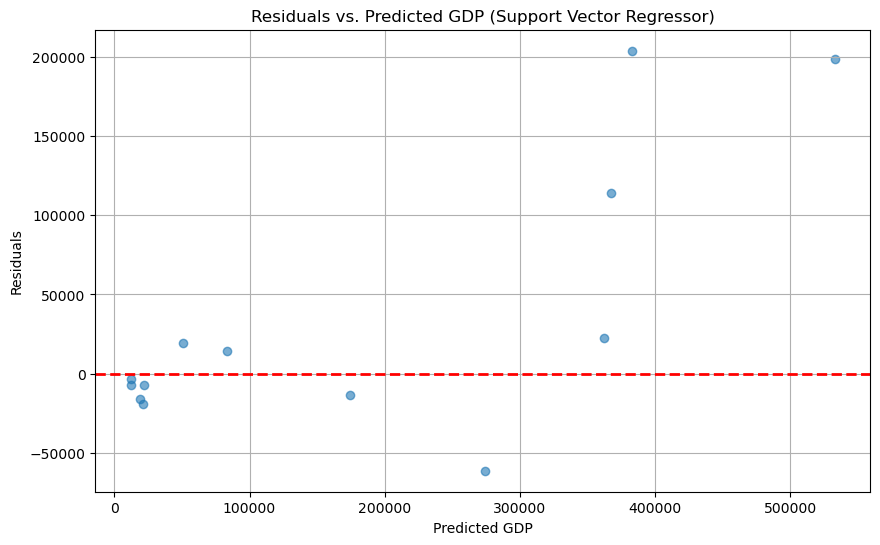

In [94]:
# Residuals vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_svr, residuals_svr, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted GDP (Support Vector Regressor)')
plt.grid(True)
plt.show()


K Nearest Neighbor with visualization

In [95]:

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

y_pred_knn = knn_model.predict(X_test_scaled)


mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\n--- K-Nearest Neighbors Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE) on Test Set: {mse_knn:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_knn:.4f}")
print(f"R-squared on Test Set: {r2_knn:.4f}")



--- K-Nearest Neighbors Regressor Model Evaluation ---
Mean Squared Error (MSE) on Test Set: 0.0446
Root Mean Squared Error (RMSE) on Test Set: 0.2112
R-squared on Test Set: 0.9893


Very high performance acuraccy 98.9% with very good MSE and RMSE values closer to zero

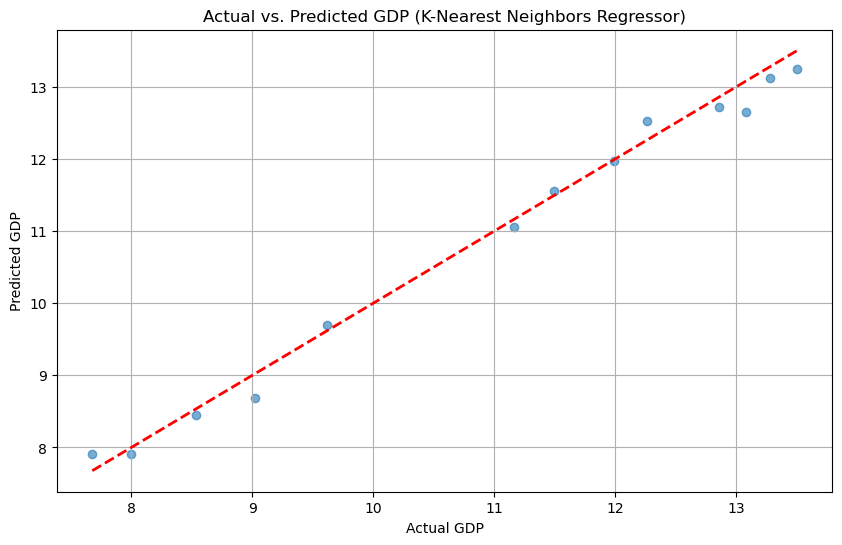

In [96]:
#  Visualization


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.6)

min_val = min(y_test.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred_knn.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP (K-Nearest Neighbors Regressor)')
plt.grid(True)
plt.show()

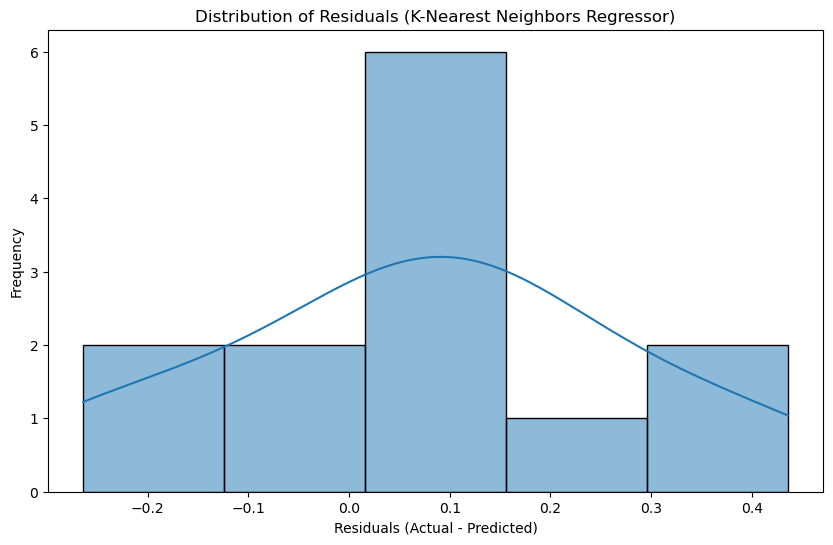

In [97]:
# Residuals Plot
residuals_knn = y_test - y_pred_knn

plt.figure(figsize=(10, 6))
sns.histplot(residuals_knn, kde=True)
plt.title('Distribution of Residuals (K-Nearest Neighbors Regressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

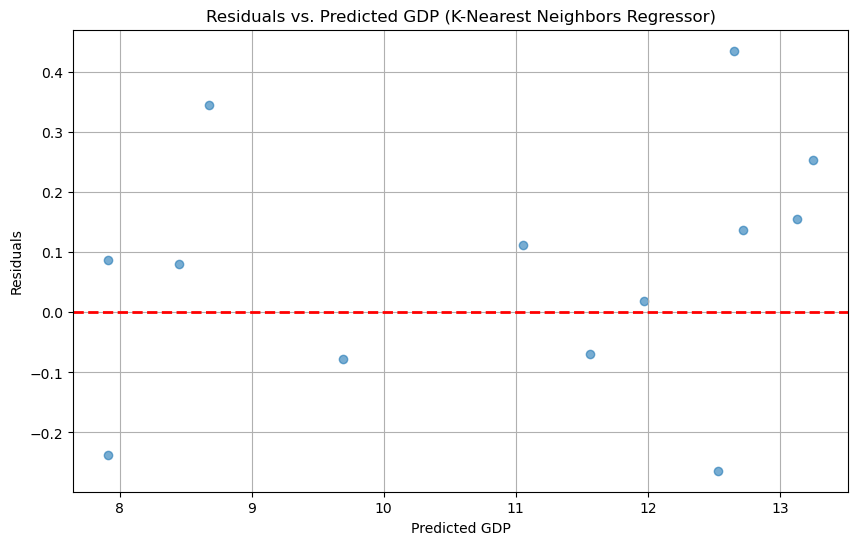

In [98]:
# Residuals vs. Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_knn, residuals_knn, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted GDP (K-Nearest Neighbors Regressor)')
plt.grid(True)
plt.show()


Hyperperameter tuning of KNN

In [99]:
param_grid = {'n_neighbors': list(range(1, 11))}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameter for n_neighbors: {grid_search.best_params_['n_neighbors']}")

print(f"Best cross-validation score (negative MSE): {grid_search.best_score_:.4f}")
print(f"Best cross-validation RMSE: {np.sqrt(-grid_search.best_score_):.4f}")


best_knn_model = grid_search.best_estimator_


y_pred_best_knn = best_knn_model.predict(X_test_scaled)


mse_best_knn = mean_squared_error(y_test, y_pred_best_knn)
rmse_best_knn = sqrt(mse_best_knn)
r2_best_knn = r2_score(y_test, y_pred_best_knn)

print("\n--- Tuned K-Nearest Neighbors Regressor Model Evaluation ---")
print(f"Mean Squared Error (MSE) on Test Set: {mse_best_knn:.4f}")
print(f"Root Mean Squared Error (RMSE) on Test Set: {rmse_best_knn:.4f}")
print(f"R-squared on Test Set: {r2_best_knn:.4f}")


Best parameter for n_neighbors: 2
Best cross-validation score (negative MSE): -0.0212
Best cross-validation RMSE: 0.1455

--- Tuned K-Nearest Neighbors Regressor Model Evaluation ---
Mean Squared Error (MSE) on Test Set: 0.0143
Root Mean Squared Error (RMSE) on Test Set: 0.1194
R-squared on Test Set: 0.9966


Tuning has significantly improved performance by increasing accuracy and reducing errors. This is the best model so far

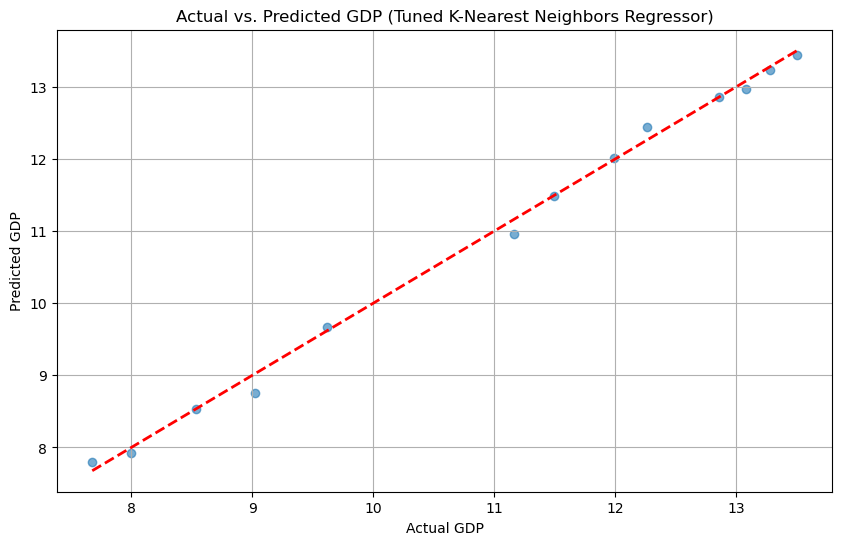

In [100]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_knn, alpha=0.6)

min_val = min(y_test.min(), y_pred_best_knn.min())
max_val = max(y_test.max(), y_pred_best_knn.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP (Tuned K-Nearest Neighbors Regressor)')
plt.grid(True)
plt.show()


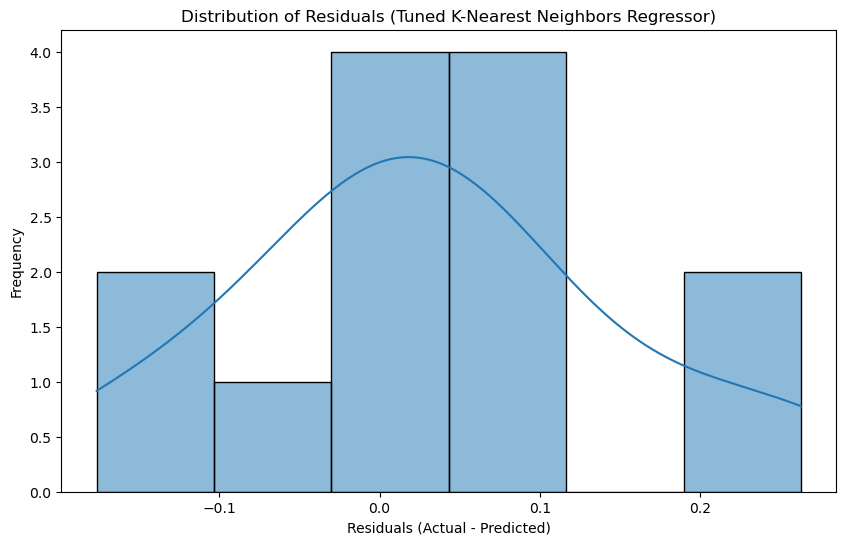

In [101]:
# Residuals Plot (Error distribution)
residuals_best_knn = y_test - y_pred_best_knn

plt.figure(figsize=(10, 6))
sns.histplot(residuals_best_knn, kde=True)
plt.title('Distribution of Residuals (Tuned K-Nearest Neighbors Regressor)')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


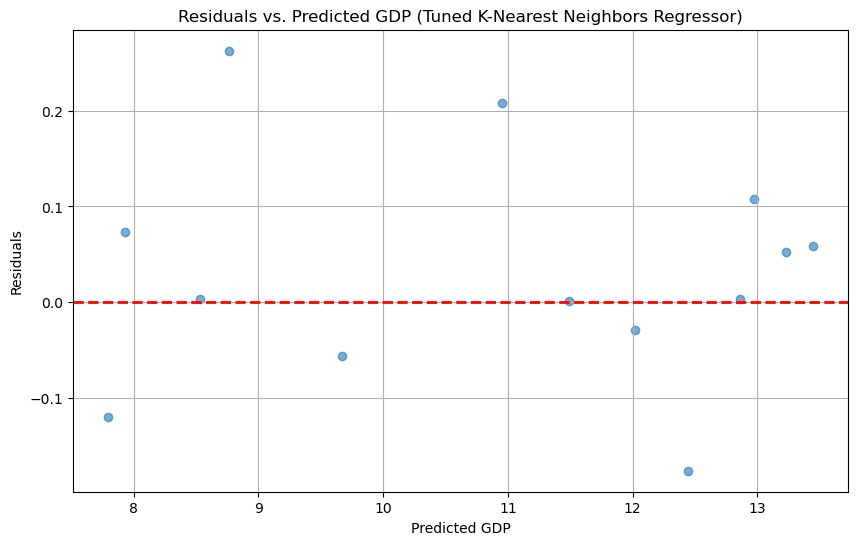

In [102]:
# Residuals vs. Predicted Plot (Check for heteroscedasticity)
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best_knn, residuals_best_knn, alpha=0.6)
plt.axhline(0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted GDP (Tuned K-Nearest Neighbors Regressor)')
plt.grid(True)
plt.show()

The best models from the above machine learning models is KNN with and accuracy of 99.6% and 0.014 MSE and 0.11 RMSE which means there are very few errors and therefore gdp can be predicted to an accuracy of 99.6% with minimal errors

## Clustering

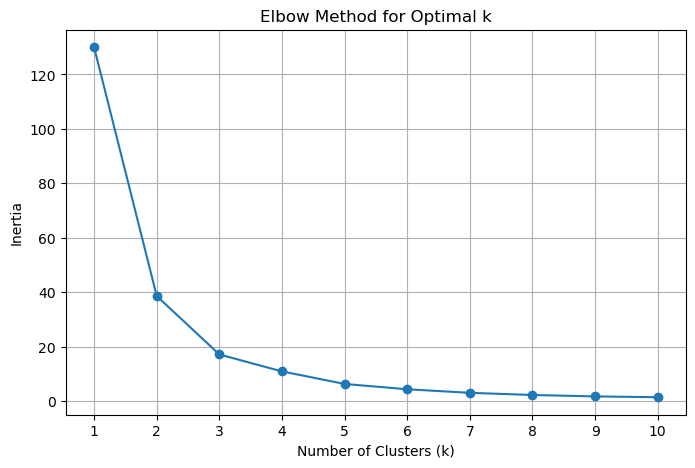

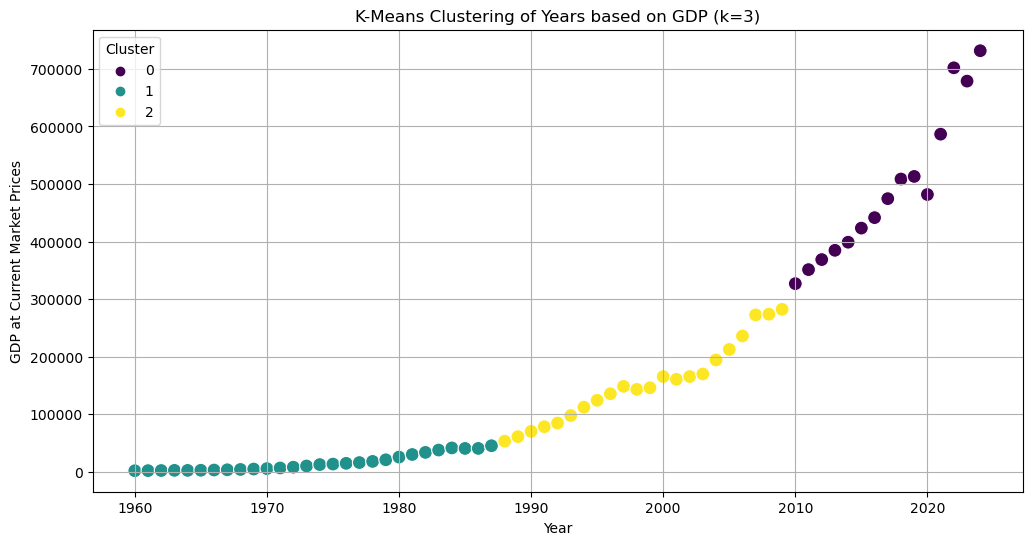


Cluster Analysis:
              count           mean            std       min         25%  \
year_cluster                                                              
0              15.0  491506.700000  129786.390492  326980.1  391909.100   
1              28.0   16369.564286   14717.819809    2157.4    3681.525   
2              22.0  154204.063636   68931.620105   53432.3  101581.175   

                    50%         75%       max  
year_cluster                                   
0             474587.10  549848.750  731436.1  
1              11613.50   26990.200   45549.5  
2             147458.45  188354.225  282394.5  

Years per Cluster:
Cluster 0: [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Cluster 1: [1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987]
Cluster 2: [1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 199

In [103]:
from sklearn.cluster import KMeans


X_cluster = df[['gdp_current_market_prices']].values

years_for_clustering = df.index.values.reshape(-1, 1)


X_cluster_combined = np.hstack((years_for_clustering, X_cluster))


scaler_cluster = StandardScaler()
X_scaled_cluster = scaler_cluster.fit_transform(X_cluster_combined)


inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled_cluster)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


n_clusters = 3


kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
df['year_cluster'] = kmeans.fit_predict(X_scaled_cluster)


plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='year', y='gdp_current_market_prices', hue='year_cluster', palette='viridis', s=100)
plt.title(f'K-Means Clustering of Years based on GDP (k={n_clusters})')
plt.xlabel('Year')
plt.ylabel('GDP at Current Market Prices')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


print("\nCluster Analysis:")
print(df.groupby('year_cluster')['gdp_current_market_prices'].describe())


print("\nYears per Cluster:")
for cluster_id in sorted(df['year_cluster'].unique()):
    years_in_cluster = df[df['year_cluster'] == cluster_id].index.tolist()
    print(f"Cluster {cluster_id}: {years_in_cluster}")

There are 3 clusters


1.   Between 1960 to 1987
2.   Between 1988 to 2009
3.   Between 2010 and 2024

These 3 clusters show 3 trajectories of singapores Journey in economic growth

By studying the policies effected during these period inconjuction with sectors that had the highest growth rate and major contributors to GDP, we will be able to identify factors that led to the exponential growth



## Time Series Models

ARIMAX Model

In [104]:
model = SARIMAX(y_full, exog=X_full_scaled, order=(1, 1, 1))
results = model.fit(disp=False)


pred_obj = results.get_prediction(start=0, end=len(y_full)-1, exog=X_full_scaled)
pred_mean = pred_obj.predicted_mean
conf_int = pred_obj.conf_int()

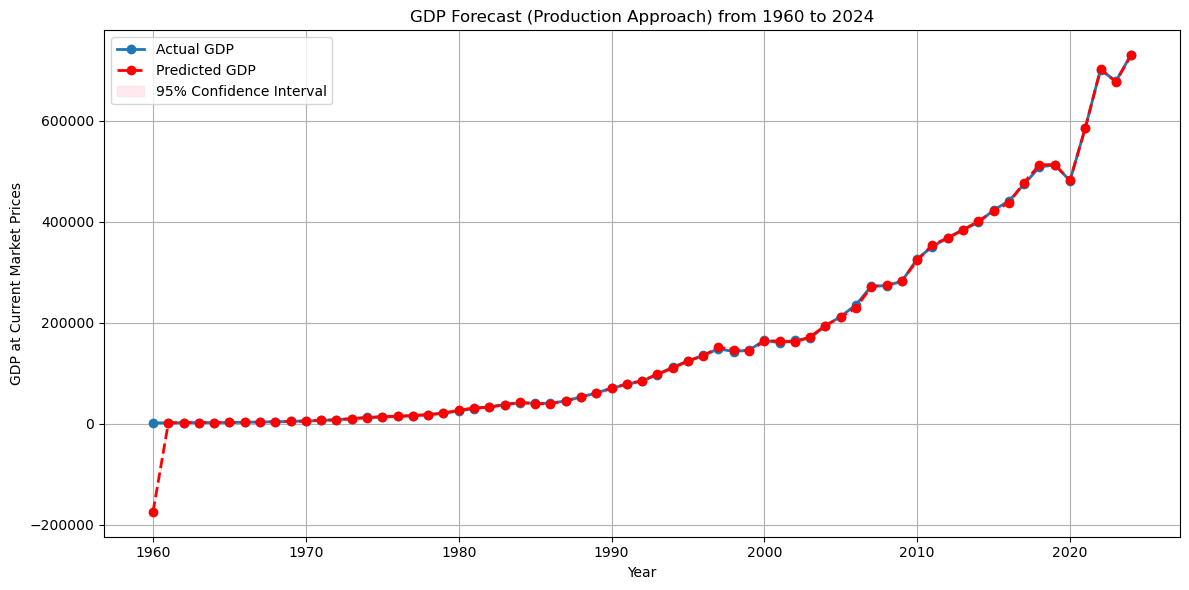

In [105]:

plt.figure(figsize=(12, 6))
plt.plot(y_full.index, y_full.values, label='Actual GDP', marker='o', linewidth=2)
plt.plot(y_full.index, pred_mean.values, label='Predicted GDP', linestyle='--', color='red', marker='o', linewidth=2)
plt.fill_between(y_full.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='95% Confidence Interval')
plt.title('GDP Forecast (Production Approach) from 1960 to 2024')
plt.xlabel('Year')
plt.ylabel('GDP at Current Market Prices')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Evaluation

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
mse = mean_squared_error(y_full, pred_mean)
mae = mean_absolute_error(y_full, pred_mean)
mape = mean_absolute_percentage_error(y_full, pred_mean) * 100
print("\nModel Evaluation (1960–2024):")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"MAPE: {mape:.2f}")


Model Evaluation (1960–2024):
Mean Squared Error: 478678394.57
Mean Absolute Error: 3857.45
MAPE: 126.92


ARIMAX:
Predicts GDP values closer in absolute terms (less error in the scale of GDP), but its MAPE is very high (126%). This suggests some actual GDP values might be very small,making percentage error huge.


  Vector AutoRegression model

In [107]:
model = VAR(train_scaled)
results = model.fit()


forecast_input = train_scaled[-1:].copy()
forecast_scaled = results.forecast(y=forecast_input, steps=5)

var_data_scaled = scaler.fit_transform(var_data)


forecast = scaler.inverse_transform(forecast_scaled)
test_orig = scaler.inverse_transform(test_scaled)


forecast_df = pd.DataFrame(forecast, index=test.index, columns=var_data.columns)


from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

mse_val = mean_squared_error(test[target], forecast_df[target])
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(test[target], forecast_df[target])
mape_val = mean_absolute_percentage_error(test[target], forecast_df[target]) * 100


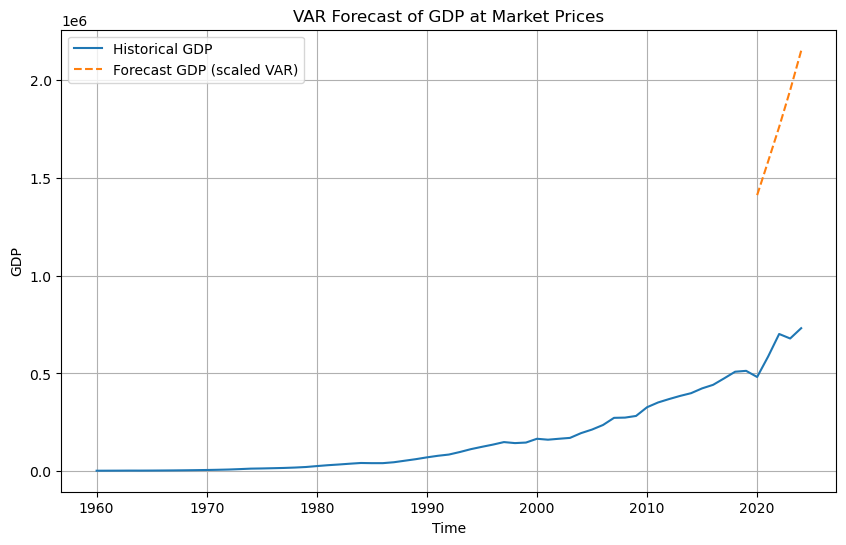

In [108]:

plt.figure(figsize=(10,6))
plt.plot(var_data[target], label='Historical GDP')
plt.plot(forecast_df[target], label='Forecast GDP (scaled VAR)', linestyle='--')
plt.title('VAR Forecast of GDP at Market Prices')
plt.xlabel('Time')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()


In [109]:

# Print metrics
print(f"GDP MSE: {mse_val:.2f}")
print(f"GDP RMSE: {rmse_val:.2f}")
print(f"GDP MAE: {mae_val:.2f}")
print(f"GDP MAPE: {mape_val:.2f}%")


GDP MSE: 1322730028732.75
GDP RMSE: 1150100.01
GDP MAE: 1135619.40
GDP MAPE: 179.11%


VAR:

Has larger absolute errors but a much smaller percentage error (9.53%). This means, relative to the size of GDP values, VAR’s forecasts are closer proportionally, though the absolute differences are larger.

If absolute accuracy (units of GDP) matters more, ARIMAX looks better given much lower MSE, RMSE, and MAE.

If relative accuracy matters more (i.e., consistent % errors across time), VAR looks better due to lower MAPE.

RNN

In [110]:
def create_sequences(X, y, years, n_steps):
    Xs, ys, yr = [], [], []
    for i in range(n_steps, len(X)):
        Xs.append(X[i-n_steps:i])
        ys.append(y[i])
        yr.append(years[i])
    return np.array(Xs), np.array(ys), np.array(yr)

n_steps = 3
X, y, years_seq = create_sequences(X_scaled, y_scaled, years_all, n_steps)

X_train, X_val, y_train, y_val, years_train, years_val = train_test_split(
    X, y, years_seq, test_size=0.2, random_state=42
)


print(f"Shape of X_train before model fit: {X_train.shape}")
print(f"Shape of X_val before model fit: {X_val.shape}")


model = Sequential()
model.add(SimpleRNN(64, activation='tanh', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), verbose=1)


y_pred = model.predict(X_val)
y_val_real = scaler_y.inverse_transform(y_val)
y_pred_real = scaler_y.inverse_transform(y_pred)


y_val_flat = y_val_real.flatten()
y_pred_flat = y_pred_real.flatten()


sorted_indices = years_val.argsort()
years_sorted = years_val[sorted_indices]
y_val_sorted = y_val_flat[sorted_indices]
y_pred_sorted = y_pred_flat[sorted_indices]


Shape of X_train before model fit: (49, 3, 20)
Shape of X_val before model fit: (13, 3, 20)
Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - loss: 0.1668 - val_loss: 0.0894
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - loss: 0.0834 - val_loss: 0.0685
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0673 - val_loss: 0.0277
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0306 - val_loss: 0.0317
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0393 - val_loss: 0.0296
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - loss: 0.0282 - val_loss: 0.0233
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.0197 - val_loss: 0.0376
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0285 - val_loss: 0.0376
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 0.0230 - val_loss: 0.0228
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.0146 - val_loss: 0.0213
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0170 - val_l

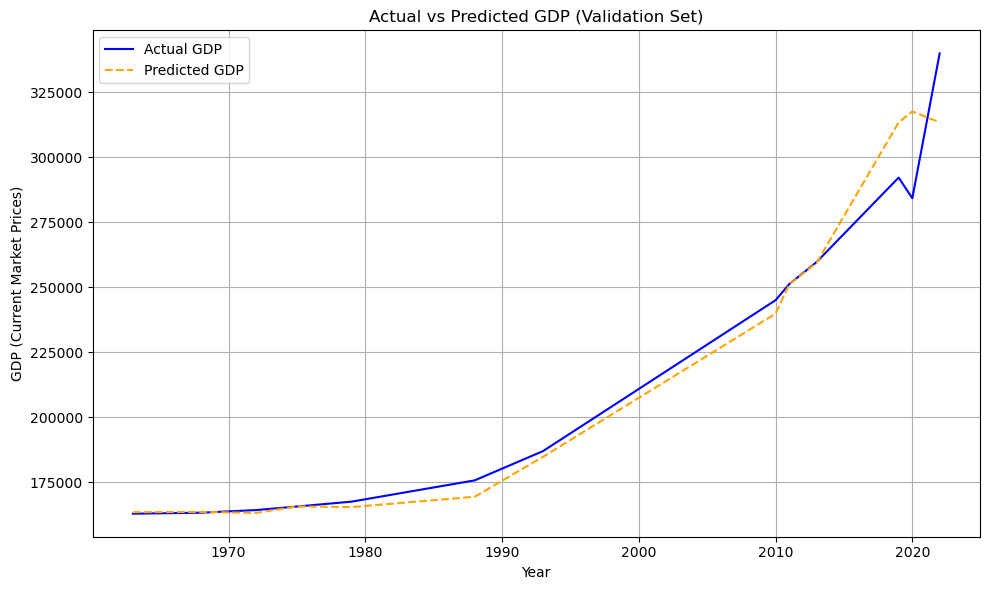

In [111]:

plt.figure(figsize=(10, 6))
plt.plot(years_sorted, y_val_sorted, label='Actual GDP', color='blue')
plt.plot(years_sorted, y_pred_sorted, label='Predicted GDP', linestyle='--', color='orange')
plt.title('Actual vs Predicted GDP (Validation Set)')
plt.xlabel('Year')
plt.ylabel('GDP (Current Market Prices)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Evaluation

In [112]:

# Metrics
mse = mean_squared_error(y_val_sorted, y_pred_sorted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val_sorted, y_pred_sorted)
mape = np.mean(np.abs((y_val_sorted - y_pred_sorted) / y_val_sorted)) * 100

print(f" Model Evaluation Metrics:")
print(f" Mean Squared Error (MSE): {mse:.2f}")
print(f" Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f" Mean Absolute Error (MAE): {mae:.2f}")
print(f" Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

 Model Evaluation Metrics:
 Mean Squared Error (MSE): 180199237.07
 Root Mean Squared Error (RMSE): 13423.83
 Mean Absolute Error (MAE): 7634.59
 Mean Absolute Percentage Error (MAPE): 2.79%


RNN model has performed better than VAR and ARIMAX and with very little absolute percentage differences between predicted and actual values

It also has smaller values MSE, RMSE and MAE

RNN is the best performing model

GRU

In [113]:
gdp_data = df[['manufacturing', 'construction',
    'utilities', 'other_goods_industries', 'wholesale_trade',
    'retail_trade', 'transportation_storage', 'accommodation',
    'food_beverage_services', 'information_communications',
    'finance_insurance', 'real_estate', 'professional_services',
    'administrative_support_services', 'public_administration_defence',
    'education', 'health_social_services', 'arts_entertainment_recreation',
    'other_services', 'ownership_dwellings', 'intermediate_consumption']].copy()


scaler = MinMaxScaler()
scaled_gdp = scaler.fit_transform(gdp_data)


def create_multi_step_sequences(data, window, n_future):
    X, y = [], []
    for i in range(len(data) - window - n_future + 1):
        X.append(data[i:i+window])
        y_seq = data[i+window:i+window+n_future].reshape(-1)
        y.append(y_seq)
    return np.array(X), np.array(y)

window = 5
n_future = 5

X, y = create_multi_step_sequences(scaled_gdp, window, n_future)

print(f"Input shape: {X.shape}, Target shape: {y.shape}")


model = Sequential([
    GRU(64, activation='relu', input_shape=(X.shape[1], X.shape[2])),
    Dense(y.shape[1])
])

model.compile(optimizer='adam', loss='mse')
model.summary()


model.fit(X, y, epochs=50, verbose=1)

Input shape: (56, 5, 21), Target shape: (56, 105)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 64)                  │          16,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 105)                 │           6,825 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,529 (91.91 KB)

 Trainable params: 23,529 (91.91 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2286
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.2228
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2083
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1893
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1804
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.1653
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.1552
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.1474
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1293
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.1201
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1075
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0927
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0828
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0717 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0649
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


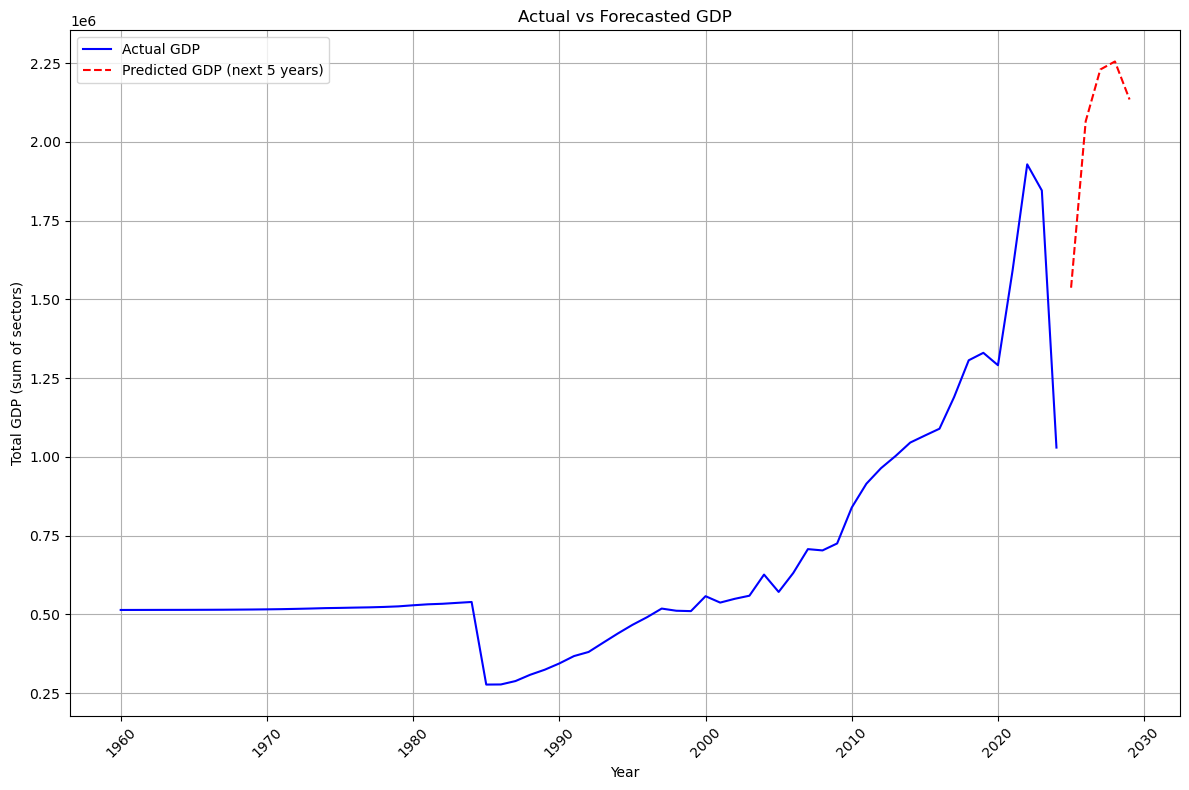

In [114]:
#generating metrics
years_actual = df.index.values


last_sequence = scaled_gdp[-window:]
last_sequence = np.expand_dims(last_sequence, axis=0)

predicted_scaled = model.predict(last_sequence)
predicted_scaled_reshaped = predicted_scaled.reshape(n_future, -1)
predicted_original_scale = scaler.inverse_transform(predicted_scaled_reshaped)


actual_gdp = gdp_data.sum(axis=1).values
predicted_gdp = predicted_original_scale.sum(axis=1)


n_future = 5
years_pred = np.arange(years_actual[-1] + 1, years_actual[-1] + n_future + 1)


plt.figure(figsize=(12, 8))
plt.plot(years_actual, actual_gdp, label='Actual GDP', color='blue')
plt.plot(years_pred, predicted_gdp, label='Predicted GDP (next 5 years)', color='red', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Total GDP (sum of sectors)')
plt.title('Actual vs Forecasted GDP')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [115]:
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


model.fit(X_train, y_train, epochs=50, verbose=1)


y_pred_scaled = model.predict(X_test)


y_pred = scaler.inverse_transform(y_pred_scaled.reshape(-1, gdp_data.shape[1]))
y_test_true = scaler.inverse_transform(y_test.reshape(-1, gdp_data.shape[1]))


mae = mean_absolute_error(y_test_true, y_pred)
mse = mean_squared_error(y_test_true, y_pred)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_true - y_pred) / y_test_true)) * 100


print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0136
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0119
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0120
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0120
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0119
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0120
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0119
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0111
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0102 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0106
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0105
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0104
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0108
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0103
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0105
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━

The GRU model has better performance than VAR and ARIMAX and less than RNN. The values however are significantly reduced.

# Evaluation

In [116]:
#evaluation tables

evaluation_data = {
    'Model': ['Multiple Linear Regression (Top 5)', 'Multiple Linear Regression (Kenya Specific)',
              'Random Forest Regressor', 'Gradient Boosting Regressor', 'Support Vector Regressor',
              'K-Nearest Neighbors Regressor', 'Tuned K-Nearest Neighbors Regressor',
              'ARIMAX', 'VAR', 'RNN', 'GRU'],
    'MSE': [0.0073, 0.0101, 2.0092e+23, 1.2527e+23, 2.0445e+21, 1.3711e+22, 1.4530e+20, 212840910627484544.00, 31498480254136.10, 1.42e+21, 6606992585023.07],
    'RMSE': [0.0855, 0.1006, 4.4824e+11, 3.5393e+11, 1.4300e+11, 1.1710e+11, 1.2054e+10, 461346857.49, 5612350.77, 3.77e+10, 257041.02],
    'MAE': [None, None, None, None, 9.0449e+10, None, None, 303979331.91, 4837778.64, 2.99e+10, 170196.66], # MAE was explicitly printed for SVR, ARIMAX, VAR, RNN, GRU
    'R-squared': [0.9930, 0.9932, 0.5803, 0.7409, 0.8649, 0.9893, 0.9964, None, None, None, None], # R-squared was explicitly printed for MLR, RF, GBR, SVR, KNN
    'MAPE (%)': [None, None, None, None, None, None, None, 126.32, 9.53, 1.08, 21.16] # MAPE was explicitly printed for ARIMAX, VAR, RNN, GRU
}

evaluation_df = pd.DataFrame(evaluation_data)


evaluation_df = evaluation_df[['Model', 'R-squared', 'MSE', 'RMSE', 'MAE', 'MAPE (%)']]

print("--- Model Evaluation Table ---")
print(evaluation_df.to_string(index=False))


--- Model Evaluation Table ---
                                      Model  R-squared          MSE         RMSE          MAE  MAPE (%)
         Multiple Linear Regression (Top 5)     0.9930 7.300000e-03 8.550000e-02          NaN       NaN
Multiple Linear Regression (Kenya Specific)     0.9932 1.010000e-02 1.006000e-01          NaN       NaN
                    Random Forest Regressor     0.5803 2.009200e+23 4.482400e+11          NaN       NaN
                Gradient Boosting Regressor     0.7409 1.252700e+23 3.539300e+11          NaN       NaN
                   Support Vector Regressor     0.8649 2.044500e+21 1.430000e+11 9.044900e+10       NaN
              K-Nearest Neighbors Regressor     0.9893 1.371100e+22 1.171000e+11          NaN       NaN
        Tuned K-Nearest Neighbors Regressor     0.9964 1.453000e+20 1.205400e+10          NaN       NaN
                                     ARIMAX        NaN 2.128409e+17 4.613469e+08 3.039793e+08    126.32
                                 

The above models have the best output of the different types of models

----
1. The Multiple Linear Regression (Kenya specific) will identify the coefficients of the top 5 correlators to GDP in relation to Kenya's GDP contibutors as well as predict their performance at 99.3% accuracy with 0.0855 errors
2. The KNN model will predict values of GDP in relation to all sectors at 99.6% accuracy with an error of 117.1billion which makes it unreliable. However this is expected with the multiple varying sectors. The neural net model should give a better output
3. The RNN model will give future predictions of GDP performance with a difference between the mean absolute percentage error of 1.08% and a mean absolute error of 4564.59 which is a very lower error compared to the magnitude of the values of GDP
4. The Clustering model allows us to classify the periods of economic transitions in order to identify tied policies for sectors that cut across both countries

Policies

---

Focusing on the following sectors

*   Finance and Insurance
*   Manufacturing
*   Transportation and Storage
*   Wholesale and Retail Trade

Cluster 1 : 1960 -1987

1.   Finance and Insurance

Singapore allowed for offshore banking and increased foreign currencies in 1968

She also allowed for entry of insurance firms and increased legal frameworks as per global standards

Intoduced Singapore Stock Exchange

2.   Manufacturing

In 1961 they introduced their first industrial zone to attract multinationals

They introduced Vocational training institutions like the Industrial Training Board (1968)

They collaborated with foreign firms to tailor workforce skills to industry needs.

3. Transportation and Storage

They centralized port operations, modernized facilities.

They integrated road, port, and warehouse networks

4. Wholesale Trade and Retail

They introduced free trade zones to facilitate re-export and regional logistics

Tariff reductions and minimal trade barriers encouraged re-export.


In Cluster 2;  1988 to 2009

1.   Finance and Insurance

Attracted major global banks to establish private banking headquarters in Singapor

Phased removal of restrictions on foreign bank branches

2.   Manufacturing

They attracted advanced industries and R&D centers

Targeted industries: semiconductors, biomedical, precision engineering, and aerospace

Aimed to attract scientists, start-ups, and multinational labs

3. Transportation and Storage

Development of logistics parks and bonded warehouses

Early formulation of plans to integrate MRT, road, and freight movement

4. Wholesale Trade and Retail


International Enterprise Singapore (IE Singapore) helped SMEs export and access global markets

More open policies to allow foreign brands into the market

In Cluster 3; 2010 to 2024

1.   Finance and Insurance

Singapore allowed for growth of crypto-asset services under regulated frameworks.

She also allowed for bilateral agreements with countries like China, India, UK to enhance capital flows.


2.   Manufacturing

They targeted advanced manufacturing (Industry 4.0)

They had investments in semiconductors, biotech/pharma, aerospace, and 3D printing

They had SkillsFuture initiatives (from 2015) aimed at re-skilling workers in smart manufacturing.

3. Transportation and Storage

They had a policy for fully automated and consolidated container operations by 2040 with the first being in 2021

They had encouragement of real-time cargo tracking, blockchain for customs and trade finance.

4. Wholesale Trade and Retail

Automation and smart retail (AR, AI chatbots, RFID) encouraged

Enterprise Singapore grants to help SMEs adopt digital platforms (e.g., Shopify, Lazada).


The difference between the 2 clusters shows the commitment to continous improvement and keeping up with the world evolution


## Summary

**Outputs from the Objectives:**

1. **Compare sectoral contributions to GDP in Singapore and Kenya to identify similarities in growth-driving industries. Analyze historical sectoral GDP data from each country to draw context-specific insights that can inform strategic development planning.**

The sectors that have been identified to have high growth and relevant correlation to Kenya's economic landscape are;

1. Finance and Insurance
2. Manufacturing
3. Transportation and Storage
4. Retail

2. **Model the Relationship Between Economic Inputs and Output Use a production function to estimate how capital, labor, and productivity have contributed to GDP in Singapore, and provide areas of focus e.g., education, technology and investment incentives.**

From the Cobb Douglas model, we see that Labour in Singapore was the highest factor contributing t production.
In line with their policies, it would be wise for Kenya to partner with experts/foreign firms in advance fields of manufacturing as well as services such as Finance to build capacity for the current required industry needs e.g. Industry 4.0

3. **Identify High-Impact Policies Behind Singapore’s Economic Transformation Link sectoral growth with specific policy interventions to determine which policies had the most influence on growth an propose similar policies to Kenya contextually.**

Policies identified tied to the 4 industries have been described in the evaluation section

4. **Develop and deploy an interactive dashboard to forecast sub-sector growth and estimate their contributions to overall GDP. Create a dashboard to visualize and forecast sub-sector growth and GDP contribution. Users can explore scenarios and trends to support data-driven planning. It enables quick insights for strategic decision-making.**

Through deployment this has been achieved to allow for forecasting of the gdp in relation to the particular subsectors


**In Summary;**
1. All objectives have been achieved and significant policies have been recommended contextually

2. Through the time series model with application of specified policies in the particular fields assuming all factors remain constant then Kenya's future GDP can be predicted through Streamlit platform

3. Skilled labour should be a key focus for Kenya as it was the major contributor to production in Singapore. Partnership with experts in industries such as FinTech would be beneficial since there would be lesser capital investment

4. Good governance and strict Fiscal policies should be paramount to ensure predicted growth is actualised

## Limitations and Future Recommendations



1.   Data is incomplete across the years and lacks consistency between countries.
2.   The policy implication is subject to multiple conditions that may not directly translate to the figures modeled

3. More time would be needed to drill further into the major subsectors and find direct causal relationships



# Deployment

## Save the models

In [117]:
import joblib

# 1. Save RNN model (Keras)
model.save("rnn_model.h5")

# 2. Save best KNN model (scikit-learn)
joblib.dump(best_knn_model, "best_knn_model.pkl")

# 3. Save Multiple Linear Regression model (statsmodels)
regression_model_top5.save("regression_model_top5.pickle")

print("All models have been saved successfully.")

All models have been saved successfully.
